# Exploratory Data Analysis



#### Import Packages and Setting File Paths

In [2]:
import sys
import os

# Get the current working directory
current_dir = os.getcwd()

# Add the parent directory to sys.path
parent_dir = os.path.abspath(os.path.join(current_dir, '..'))
sys.path.insert(0, parent_dir)

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
from urllib.request import urlretrieve
from scipy.stats import pearsonr

from config.config import DATA_PATH


In [4]:
pd.set_option('display.max_columns', None)

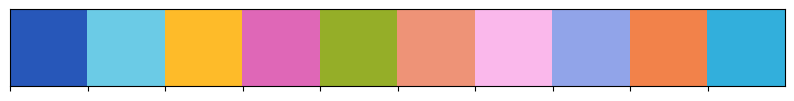

In [5]:
palette = {
    'Saphire': '#2757B9',
    'Sky blue': '#6bcbe6',
    'Selective yellow': '#febb29',
    'Sky magenta': '#df67b7',
    'Apple green': '#95ae28',
    'Atomic tangerine': '#ee9377',
    'Lavender pink': '#fab8eb',
    'Vista Blue': '#91a4e9',
    'Orange (Crayola)': '#f2824a',
    'Process Cyan': '#32afdc'
}
color_codes = list(palette.values())

palette = sns.color_palette(color_codes)
sns.set_palette(palette)

sns.palplot(sns.color_palette(color_codes))


# Flights Data Overview

In [6]:
df = pd.read_csv(DATA_PATH + '/interim/flights_historical_performance_imputed.csv')

/var/folders/b2/nkpmrw0s42q_zm32rwshljyr0000gn/T/ipykernel_53549/3069822374.py:1: DtypeWarning: Columns (24) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(DATA_PATH + '/interim/flights_historical_performance_imputed.csv')


In [7]:
flights = df

In [8]:
flights.shape

(7276990, 84)

In [9]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7276990 entries, 0 to 7276989
Data columns (total 84 columns):
 #   Column                            Dtype  
---  ------                            -----  
 0   year                              int64  
 1   quarter                           int64  
 2   month                             int64  
 3   day_of_month                      int64  
 4   day_of_week                       int64  
 5   marketing_airline_id              int64  
 6   flight_number_marketing_airline   int64  
 7   operating_airline_id              int64  
 8   tail_number                       object 
 9   origin_airport_id                 int64  
 10  origin_city_market_id             int64  
 11  origin                            object 
 12  origin_state                      object 
 13  dest_airport_id                   int64  
 14  dest_city_market_id               int64  
 15  dest                              object 
 16  dest_state                        ob

In [10]:
flights.head()

,year,quarter,month,day_of_month,day_of_week,marketing_airline_id,flight_number_marketing_airline,operating_airline_id,tail_number,origin_airport_id,origin_city_market_id,origin,origin_state,dest_airport_id,dest_city_market_id,dest,dest_state,dep_delay,dep_del15,departure_delay_groups,taxi_out,taxi_in,arr_delay,cancelled,cancellation_code,diverted,scheduled_elapsed_time,actual_elapsed_time,distance,distance_group,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,div_airport_landings,code_share_flight,origin_city,destination_city,scheduled_departure_datetime,scheduled_arrival_datetime,actual_departure_datetime,actual_arrival_datetime,airline_mkt,airline_ops,origin_timezone,destination_timezone,scheduled_departure_datetime_utc,actual_departure_datetime_utc,scheduled_arrival_datetime_utc,actual_arrival_datetime_utc,is_holiday,dep_delay_clipped,arr_delay_clipped,route_id,hour_of_day,departure_window,dep_delay_mean_10D,dep_delay_median_10D,dep_delay_max_10D,arr_delay_mean_10D,arr_delay_median_10D,arr_delay_max_10D,cancelled_sum_10D,div_airport_landings_sum_10D,n_flights_10D,dep_delay_mean_30D,dep_delay_median_30D,dep_delay_max_30D,arr_delay_mean_30D,arr_delay_median_30D,arr_delay_max_30D,cancelled_sum_30D,div_airport_landings_sum_30D,n_flights_30D,dep_delay_mean_90D,dep_delay_median_90D,dep_delay_max_90D,arr_delay_mean_90D,arr_delay_median_90D,arr_delay_max_90D,cancelled_sum_90D,div_airport_landings_sum_90D,n_flights_90D
0,2023,3,8,6,7,20416,2252,20416,N978NK,12889,32211,LAS,NV,11057,31057,CLT,NC,NaN,NaN,NaN,NaN,NaN,NaN,1,B,0,263.0,NaN,1916.0,8,NaN,NaN,NaN,NaN,NaN,0.0,0,Las Vegas,Charlotte,2023-08-06 23:59:00,2023-08-07 07:22:00,NaN,NaN,Spirit Air Lines,Spirit Air Lines,America/Los_Angeles,America/New_York,2023-08-07 07:00:00+00:00,NaN,2023-08-07 11:00:00+00:00,NaN,0,NaN,NaN,3228,23,late night,5.125000,2.0,31.0,-5.000000,-6.0,16.0,3.0,0.0,8.0,15.518519,5.0,82.0,4.923077,0.5,62.0,4.0,0.0,27.0,15.714286,6.0,163.0,4.903614,-2.0,166.0,5.0,0.0,84.0
1,2023,3,8,7,1,20416,2252,20416,N974NK,12889,32211,LAS,NV,11057,31057,CLT,NC,76.0,1.0,5.0,19.0,9.0,69.0,0,NaN,0,263.0,256.0,1916.0,8,3.0,0.0,1.0,0.0,65.0,0.0,0,Las Vegas,Charlotte,2023-08-07 23:59:00,2023-08-08 07:22:00,2023-08-08 01:15:00,2023-08-08 08:31:00,Spirit Air Lines,Spirit Air Lines,America/Los_Angeles,America/New_York,2023-08-08 07:00:00+00:00,2023-08-08 08:15:00+00:00,2023-08-08 11:00:00+00:00,2023-08-08 12:31:00+00:00,0,76.0,69.0,3228,23,late night,14.000000,2.0,76.0,4.714286,-6.0,69.0,3.0,0.0,8.0,17.740741,5.0,82.0,7.961538,5.0,69.0,4.0,0.0,27.0,16.690476,7.0,163.0,5.819277,-1.0,166.0,5.0,0.0,84.0
2,2023,3,8,9,3,20416,2252,20416,N519NK,12889,32211,LAS,NV,11057,31057,CLT,NC,-11.0,0.0,-1.0,14.0,10.0,-13.0,0,NaN,0,258.0,256.0,1916.0,8,NaN,NaN,NaN,NaN,NaN,0.0,0,Las Vegas,Charlotte,2023-08-09 23:10:00,2023-08-10 06:28:00,2023-08-09 22:59:00,2023-08-10 06:15:00,Spirit Air Lines,Spirit Air Lines,America/Los_Angeles,America/New_York,2023-08-10 06:00:00+00:00,2023-08-10 05:59:00+00:00,2023-08-10 10:00:00+00:00,2023-08-10 10:15:00+00:00,0,-11.0,-13.0,3228,23,late night,12.375000,1.5,76.0,5.000000,-6.0,69.0,3.0,0.0,8.0,15.185185,5.0,82.0,6.192308,0.5,69.0,4.0,0.0,27.0,16.710843,7.0,163.0,5.573171,-2.0,166.0,5.0,0.0,83.0
3,2023,3,8,10,4,20416,2252,20416,N532NK,12889,32211,LAS,NV,11057,31057,CLT,NC,-8.0,0.0,-1.0,12.0,7.0,-30.0,0,NaN,0,258.0,236.0,1916.0,8,NaN,NaN,NaN,NaN,NaN,0.0,0,Las Vegas,Charlotte,2023-08-10 23:10:00,2023-08-11 06:28:00,2023-08-10 23:02:00,2023-08-11 05:58:00,Spirit Air Lines,Spirit Air Lines,America/Los_Angeles,America/New_York,2023-08-11 06:00:00+00:00,2023-08-11 06:02:00+00:00,2023-08-11 10:00:00+00:00,2023-08-11 09:58:00+00:00,0,-8.0,-30.0,3228,23,late night,10.111111,1.0,76.0,0.625000,-8.5,69.0,2.0,0.0,9.0,11.851852,3.0,76.0,2.653846,-0.5,69.0,4.0,0.0,27.0,16.120482,7.0,163.0,4.573171,-3.0,166.0,5.0,0.0,83.0
4,2023,3,8,12,6,20416,2252,20416,N529NK,12889,32211,LAS,NV,11057,31057,CLT,NC,4.0,0.0,0.0,18.0,6.0,-4.0,0,NaN,0,258.0,250.0,1916.0,8,NaN,N

In [11]:
datetime_cols = ['scheduled_departure_datetime', 'scheduled_arrival_datetime', 'actual_departure_datetime', 'actual_arrival_datetime', 'scheduled_departure_datetime_utc', 'actual_departure_datetime_utc', 'scheduled_arrival_datetime_utc', 'actual_arrival_datetime_utc']

for col in datetime_cols:
    flights[col] = pd.to_datetime(flights[col])

In [12]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7276990 entries, 0 to 7276989
Data columns (total 84 columns):
 #   Column                            Dtype              
---  ------                            -----              
 0   year                              int64              
 1   quarter                           int64              
 2   month                             int64              
 3   day_of_month                      int64              
 4   day_of_week                       int64              
 5   marketing_airline_id              int64              
 6   flight_number_marketing_airline   int64              
 7   operating_airline_id              int64              
 8   tail_number                       object             
 9   origin_airport_id                 int64              
 10  origin_city_market_id             int64              
 11  origin                            object             
 12  origin_state                      object             
 1

In [13]:
missing = flights.isna().sum().reset_index(name='num_missing')
missing[missing['num_missing'] > 0]

,index,num_missing
8,tail_number,19648
17,dep_delay,90160
18,dep_del15,90160
19,departure_delay_groups,90160
20,taxi_out,93119
21,taxi_in,93898
22,arr_delay,93897
24,cancellation_code,7183093
26,scheduled_elapsed_time,4
27,actual_elapsed_time,93898


In [14]:
flights[(flights['actual_departure_datetime'].isnull()) & (flights['cancelled'] == 0)]


,year,quarter,month,day_of_month,day_of_week,marketing_airline_id,flight_number_marketing_airline,operating_airline_id,tail_number,origin_airport_id,origin_city_market_id,origin,origin_state,dest_airport_id,dest_city_market_id,dest,dest_state,dep_delay,dep_del15,departure_delay_groups,taxi_out,taxi_in,arr_delay,cancelled,cancellation_code,diverted,scheduled_elapsed_time,actual_elapsed_time,distance,distance_group,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,div_airport_landings,code_share_flight,origin_city,destination_city,scheduled_departure_datetime,scheduled_arrival_datetime,actual_departure_datetime,actual_arrival_datetime,airline_mkt,airline_ops,origin_timezone,destination_timezone,scheduled_departure_datetime_utc,actual_departure_datetime_utc,scheduled_arrival_datetime_utc,actual_arrival_datetime_utc,is_holiday,dep_delay_clipped,arr_delay_clipped,route_id,hour_of_day,departure_window,dep_delay_mean_10D,dep_delay_median_10D,dep_delay_max_10D,arr_delay_mean_10D,arr_delay_median_10D,arr_delay_max_10D,cancelled_sum_10D,div_airport_landings_sum_10D,n_flights_10D,dep_delay_mean_30D,dep_delay_median_30D,dep_delay_max_30D,arr_delay_mean_30D,arr_delay_median_30D,arr_delay_max_30D,cancelled_sum_30D,div_airport_landings_sum_30D,n_flights_30D,dep_delay_mean_90D,dep_delay_median_90D,dep_delay_max_90D,arr_delay_mean_90D,arr_delay_median_90D,arr_delay_max_90D,cancelled_sum_90D,div_airport_landings_sum_90D,n_flights_90D


In [15]:
dep_missing = flights['actual_departure_datetime'].isnull()
flights[dep_missing].groupby('cancelled')['scheduled_departure_datetime'].size()

cancelled
1    93897
Name: scheduled_departure_datetime, dtype: int64

In [16]:
arr_missing = flights['actual_arrival_datetime'].isna()
flights[arr_missing].groupby('cancelled')['actual_arrival_datetime'].size()

cancelled
1    93897
Name: actual_arrival_datetime, dtype: int64

In [17]:
missing_critical_data = ((flights['actual_arrival_datetime'].isnull()) & (flights['actual_departure_datetime'].isnull()))

flights[missing_critical_data]['cancelled'].value_counts()


cancelled
1    93897
Name: count, dtype: int64

All the rows misisng `DepTime` are cancelled flights. Similarly all the rows missing `ArrTime` are cancelled flights. 

## Overall Data Attributes

**Shape:** The dataset contains information for 7,276,990 completed and cancelled flights in 2023.

**Number of Features:** There are 84 columns currently. 

**dtypes:** Columns have the expected dtypes as some initial cleaning was completed during the data import phase. 

**Missing Values:** 
* Several columns are missing values because these represent the instances of cancelled flights. These columns include information about actual departure times, arrival times, and delay types. 
* Additionally, flights that did not encounter any delays are missing values for the various delay types (Carrier, Weather, NAS (severe weather), Security, Late Aircrafts), as would be expected. 
* Just over 19,000 flights are missing tail number data. These rows will not be able to be joined with the aircraft registration dataframe later on. After gathering usefull information from these flights, I will consider dropping these rows. 
* Eight flights are missing aggregate performance data. These were all canceled flights that were also rare and did not have any other flights in any other time windows.

## Flights Status Overview

I want to look at the number and percentage of flights that were:
1. Completed
2. Cancelled
3. Arrival delays over 15 minutes
4. Departure delays over 15 minutes
5. On Time arrival
6. On Time departure
7. Early arrival
8. Early departure


In [18]:
# calculate number of completed and cancelled flights
cancelled_flights = flights['cancelled'] == 1
completed_flights = flights['cancelled'] == 0

total_cancellations = len(flights.loc[cancelled_flights])
total_completed_flights = len(flights.loc[~cancelled_flights])

print('The total number of completed flights in 2023: ', total_completed_flights)
print('The total number of cancelled flights in 2023: ', total_cancellations)

The total number of completed flights in 2023:  7183093
The total number of cancelled flights in 2023:  93897


In [19]:
# subset flights df into completed and cancelled flights
df_completed = flights.loc[completed_flights]
df_cancelled = flights.loc[cancelled_flights]

To calculate the percentage of canceled flights, use the following formula:

$$
\text{Percentage of Canceled Flights} = \left( \frac{\text{Number of Canceled Flights}}{\text{Total Number of Scheduled Flights}} \right) \times 100
$$

To calculate the percentage of completed flights, use the following formula:

$$
\text{Percentage of Completed Flights} = \left( \frac{\text{Number of Completed Flights}}{\text{Total Number of Scheduled Flights}} \right) \times 100
$$


In [20]:
flight_cancellation_perc = round(len(df_cancelled) / len(flights) * 100, 2)
flight_completion_perc = round(len(df_completed) / len(flights) * 100, 2)

print(f'The percent of cancelled flights is {flight_cancellation_perc}% and the percent of completed flights is {flight_completion_perc}%')

The percent of cancelled flights is 1.29% and the percent of completed flights is 98.71%


It is great to know that nearly all flights are completed. Although cancelled flights are somewhat of an anomaly, they usually result in high costs for the airline and dissatisfied customers. 

In [21]:
def categorize_flight_status(status):
    """
    Categorize the status of a flight based on its delay time.

    This function classifies the flight status into one of four categories:
    'early', 'on time', 'delayed', or 'unknown'. The classification is based on
    the numerical value provided to the function, which represents the flight's
    delay in minutes.

    Parameters:
    status (float or int): The delay time of the flight. This can be:
        - A negative number indicating the flight arrived or departed early.
        - Zero to <15, indicating the flight was on time.
        - A positive number over 15 indicating the flight was delayed.
        - NaN or any non-numeric value, which will be categorized as 'unknown'.

    Returns:
    str: A string representing the category of the flight's timeliness:
        - 'early' if the status is less than 0.
        - 'on time' if the status is greater than or equal to 0 and less than 15.
        - 'delayed' if the status is greater than 15.
        - 'unknown' if the status is NaN or an unexpected non-numeric value.
    """

    if status < 0:
        return 'early'
    elif 0 <= status < 15 :
        return 'on time'
    elif status >= 15:
        return 'delayed'
    else:
        return 'unknown'


#### ***Are all unknown status flights cancelled flights?***

In [22]:
# categorize flights by status
flights['departure_status'] = flights['dep_delay'].apply(categorize_flight_status)
flights['arrival_status'] = flights['arr_delay'].apply(categorize_flight_status)

In [23]:
unknown_mask = ((flights['arrival_status'] == 'unknown') & (flights['cancelled'] == 1)) | (flights['departure_status'] == 'unknown') & (flights['cancelled'] == 1)
flights[unknown_mask].shape

(93897, 86)

In [24]:
unknown_mask = ((flights['arrival_status'] == 'unknown') & (flights['cancelled'] == 0)) | (flights['departure_status'] == 'unknown') & (flights['cancelled'] == 0)
flights[unknown_mask]

,year,quarter,month,day_of_month,day_of_week,marketing_airline_id,flight_number_marketing_airline,operating_airline_id,tail_number,origin_airport_id,origin_city_market_id,origin,origin_state,dest_airport_id,dest_city_market_id,dest,dest_state,dep_delay,dep_del15,departure_delay_groups,taxi_out,taxi_in,arr_delay,cancelled,cancellation_code,diverted,scheduled_elapsed_time,actual_elapsed_time,distance,distance_group,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,div_airport_landings,code_share_flight,origin_city,destination_city,scheduled_departure_datetime,scheduled_arrival_datetime,actual_departure_datetime,actual_arrival_datetime,airline_mkt,airline_ops,origin_timezone,destination_timezone,scheduled_departure_datetime_utc,actual_departure_datetime_utc,scheduled_arrival_datetime_utc,actual_arrival_datetime_utc,is_holiday,dep_delay_clipped,arr_delay_clipped,route_id,hour_of_day,departure_window,dep_delay_mean_10D,dep_delay_median_10D,dep_delay_max_10D,arr_delay_mean_10D,arr_delay_median_10D,arr_delay_max_10D,cancelled_sum_10D,div_airport_landings_sum_10D,n_flights_10D,dep_delay_mean_30D,dep_delay_median_30D,dep_delay_max_30D,arr_delay_mean_30D,arr_delay_median_30D,arr_delay_max_30D,cancelled_sum_30D,div_airport_landings_sum_30D,n_flights_30D,dep_delay_mean_90D,dep_delay_median_90D,dep_delay_max_90D,arr_delay_mean_90D,arr_delay_median_90D,arr_delay_max_90D,cancelled_sum_90D,div_airport_landings_sum_90D,n_flights_90D,departure_status,arrival_status


All unknown flights are actually flights that were cancelled. I will change unknown to say 'cancelled' for these flights. 

In [25]:
flights = flights.replace({'arrival_status':'unknown', 'departure_status':'unknown'}, 'cancelled')

### Distribution of flights by flight status for arrivals and depatures

In [26]:
arrival_status_counts = round(flights[['arrival_status']].value_counts(normalize=True) * 100, 1).sort_index()
arrival_status_counts

arrival_status
cancelled          1.3
delayed           20.3
early             60.8
on time           17.6
Name: proportion, dtype: float64

In [27]:
departure_status_counts = round(flights['departure_status'].value_counts(normalize=True) * 100, 1).sort_index()
departure_status_counts

departure_status
cancelled     1.2
delayed      20.0
early        57.3
on time      21.4
Name: proportion, dtype: float64

Cancellations are similar for both groups with approximately 1.3% and 1.2% of flights being cancelled. 

Delays ares similar for both groups with approximately 20.2% of flights experienced arrival delays and 20.0% experienced depature delays.

Slightly more flights arrive early (60.9%) compared to depart early (57.3%).

Slightly less flights arrive on time (17.6%) compared to depart on time (21.4%).



In [28]:
arrivals = flights[['arrival_status']].rename(columns={'arrival_status':'status'})
arrivals['type'] = 'arrival'

departures = flights[['departure_status']].rename(columns={'departure_status':'status'})
departures['type'] = 'departure'

status_df = pd.concat([arrivals, departures])

status_counts = status_df.groupby(['status', 'type']).size().reset_index(name='count')
status_counts

,status,type,count
0,cancelled,arrival,93897
1,cancelled,departure,90160
2,delayed,arrival,1480571
3,delayed,departure,1458296
4,early,arrival,4423934
5,early,departure,4171015
6,on time,arrival,1278588
7,on time,departure,1557519


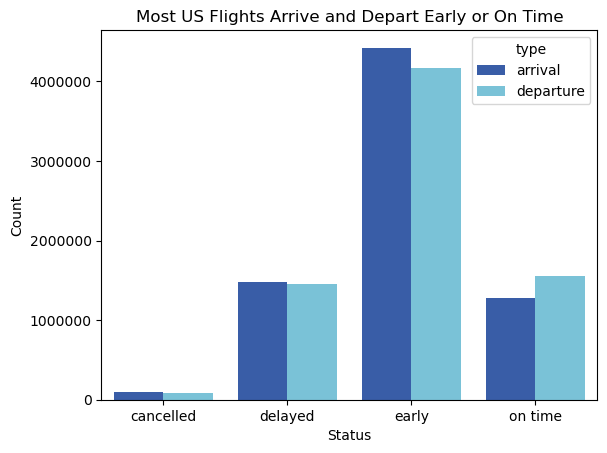

In [29]:
# create a bar plot to compare arrival and departure status counts
fig, ax = plt.subplots()

palette_2 = color_codes[2]
sns.barplot(data=status_counts, x='status', y='count', hue='type')
plt.title('Most US Flights Arrive and Depart Early or On Time')
plt.ylabel('Count')
plt.xlabel('Status')

plt.gca().yaxis.set_major_formatter(ScalarFormatter())
plt.gca().ticklabel_format(useOffset=False, style='plain', axis='y')

plt.show()

In [30]:
flights[['dep_delay', 'arr_delay']].describe().apply(lambda x: x.apply('{0:.2f}'.format))

,dep_delay,arr_delay
count,7186830.00,7183093.00
mean,12.19,7.27
std,55.79,60.31
min,-99.00,-303.00
25%,-6.00,-15.00
50%,-2.00,-6.00
75%,9.00,9.00
max,5764.00,5780.00


In [31]:
flights['cancellation_code'].value_counts()

cancellation_code
B    52562
A    25952
C    15169
D      214
Name: count, dtype: int64

In [32]:
cancellation_codes_map = {'A':'Carrier',
                          'B':'Weather', 
                          'C':'NAS', 
                          'D':'Security'}

In [33]:
flights['cancellation_code'] = flights['cancellation_code'].map(cancellation_codes_map)

In [34]:
cancelled_types = flights['cancellation_code'].value_counts().reset_index(name='count')
cancelled_types['perc_of_cancelled_flights'] = round(cancelled_types['count'] / len(flights[cancelled_flights]) * 100, 3)
cancelled_types

,cancellation_code,count,perc_of_cancelled_flights
0,Weather,52562,55.978
1,Carrier,25952,27.639
2,NAS,15169,16.155
3,Security,214,0.228


**Distribution of Departure and Arrival Delays**

Over 75% of flights arrive and depart early and/or on time. 

The range for departures is between 99 minutes early to 5,764 minutes late. The range for arrivals is between 119 minutes early and 5,780 minutes late.

Departure and arrival delays for the top 25th percentile of flights, excluding the maximum, ranges between 9 minutes to 96 hours.

There is at least one huge outlier for departure delay and arrival delay with a delay over 5,700 minutes! Next I will take a closer look at arrival and departure outliers. 

1,415,062 flights experienced an arrival delay of at least 15 minutes and 1,404,198 flights experienced a departure delay of 15 minutes.

Over 55% of flights were cancelled due to weather, 28% due to the carrier, 16% due to National Air System, and 0.22% to security reasons. 

National Air System (NAS) cancellations or delays refer to a broad set of conditions, such as non-extreme weather conditions, airport operations, heavy traffic volume, and air traffic control. Delays or cancellations coded "NAS" are the type of weather delays that could be reduced with corrective action by the airports or the Federal Aviation Administration.

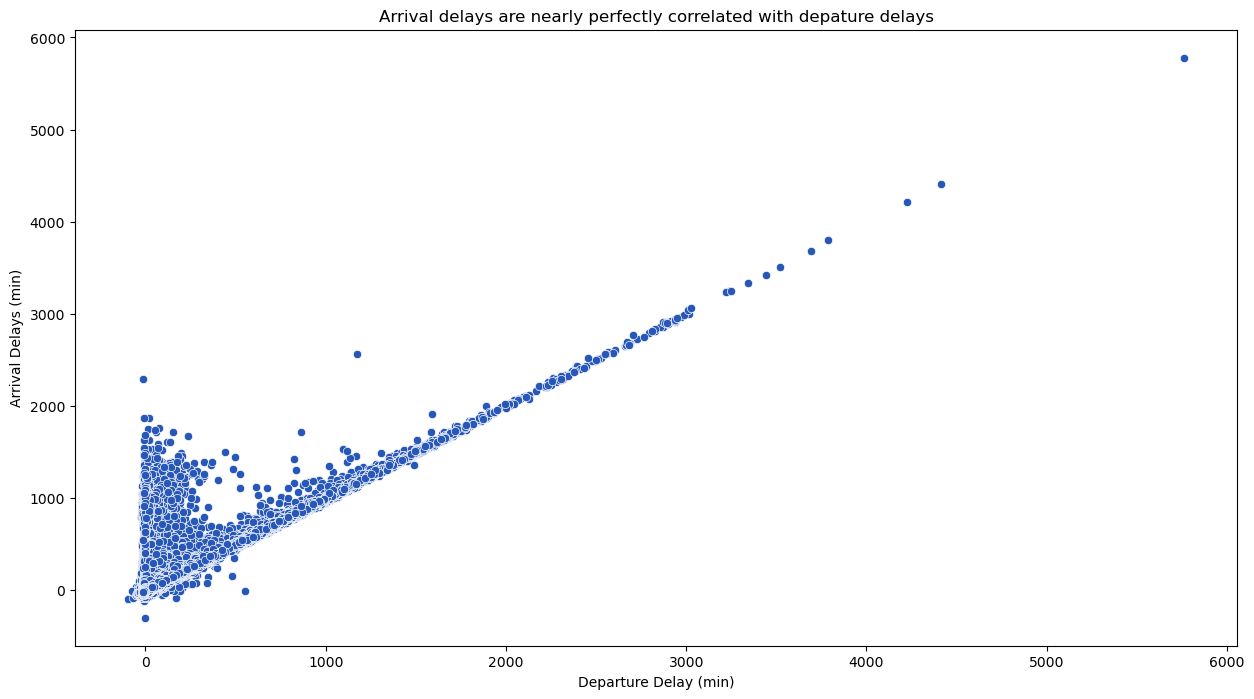

In [35]:
fig, ax = plt.subplots(figsize=(15,8))

sns.scatterplot(data=flights, x='dep_delay', y='arr_delay')
ax.set(title='Arrival delays are nearly perfectly correlated with depature delays', 
          ylabel='Arrival Delays (min)', 
          xlabel='Departure Delay (min)');


In [36]:
# calculate pearson correlation coefficient between arrival delays and departure delays
flights_corr_df = flights.dropna(subset='arr_delay')
pearsonr(flights_corr_df['dep_delay'], flights_corr_df['arr_delay'])

PearsonRResult(statistic=0.931485931414804, pvalue=0.0)

The Pearson correlation coefficient of 0.97 indicates a very strong positive linear relationship between departure delays (`DepDelay`) and arrival delays (`ArrDelay`). As departure delays increase, arrival delays increase as well. The p-value of 0.0 confirms that this correlation is statistically significant. This is not as surprising given that after a certain amount of delay, the aircraft cannot make up for lost time during depature inflight due to maximum speeds that can safely be achieved. 

## Arrival and Departure Delay Outliers

In [37]:
def identify_outliers(df, col):
    """
    Calculate the upper and lower bounds to identify outliers in a dataset.

    This function uses the Interquartile Range (IQR) to determine outliers. It computes the IQR for a specified column
    of a pandas DataFrame, and uses this to calculate boundaries that define outliers. Values falling outside of these
    boundaries are considered outliers.

    Parameters:
    df (pandas.DataFrame): The DataFrame containing the data to analyze.
    col (str): The name of the column in the DataFrame for which to calculate the outlier bounds.

    Returns:
    tuple: A tuple containing three elements:
        - upper_bound (float): The upper bound value beyond which data points are considered outliers.
        - lower_bound (float): The lower bound value below which data points are considered outliers.
        - iqr (float): The Interquartile Range (IQR) of the column.
        """
    
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1

    upper_bound = q3 + 1.5 * iqr
    lower_bound = q1 - 1.5 * iqr

    return upper_bound, lower_bound, iqr

In [38]:
arr_outlier_upper, arr_outlier_lower, arr_iqr = identify_outliers(flights, 'arr_delay')
print(f'Arrival delay upper outlier bound {arr_outlier_upper}, lower bound {arr_outlier_lower}, and IQR {arr_iqr}.')

dep_outlier_upper, dep_outlier_lower, del_iqr = identify_outliers(flights, 'dep_delay')
print(f'Departure delay upper outlier bound {dep_outlier_upper}, lower bound {dep_outlier_lower}, and IQR {del_iqr}.')

Arrival delay upper outlier bound 45.0, lower bound -51.0, and IQR 24.0.
Departure delay upper outlier bound 31.5, lower bound -28.5, and IQR 15.0.


In [39]:
palette

[(0.15294117647058825, 0.3411764705882353, 0.7254901960784313),
 (0.4196078431372549, 0.796078431372549, 0.9019607843137255),
 (0.996078431372549, 0.7333333333333333, 0.1607843137254902),
 (0.8745098039215686, 0.403921568627451, 0.7176470588235294),
 (0.5843137254901961, 0.6823529411764706, 0.1568627450980392),
 (0.9333333333333333, 0.5764705882352941, 0.4666666666666667),
 (0.9803921568627451, 0.7215686274509804, 0.9215686274509803),
 (0.5686274509803921, 0.6431372549019608, 0.9137254901960784),
 (0.9490196078431372, 0.5098039215686274, 0.2901960784313726),
 (0.19607843137254902, 0.6862745098039216, 0.8627450980392157)]

Text(0.5, 0.98, 'Distribution of Delays for Departures and Arrivals (Excluding Outliers)')

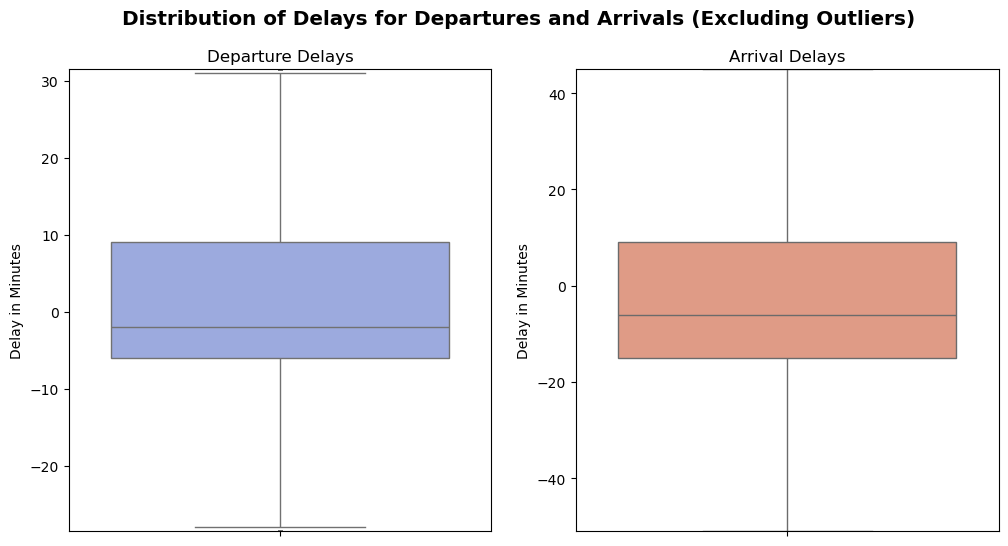

In [40]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

sns.boxplot(flights['dep_delay'], color=palette[7], ax=ax[0])
ax[0].set_ylim([dep_outlier_lower, dep_outlier_upper])
ax[0].set_title('Departure Delays')
ax[0].set_ylabel('Delay in Minutes')

sns.boxplot(flights['arr_delay'], color=palette[5], ax=ax[1])
ax[1].set_ylim([arr_outlier_lower, arr_outlier_upper])
ax[1].set_title('Arrival Delays')
ax[1].set_ylabel('Delay in Minutes')

plt.suptitle('Distribution of Delays for Departures and Arrivals (Excluding Outliers)', fontsize='x-large', fontweight='bold')



In [41]:
mask_outlier_arr = (flights['arr_delay'] > arr_outlier_upper)
outlier_delays_arr = flights[mask_outlier_arr]

mask_outlier_dep = (flights['dep_delay'] > dep_outlier_upper)
outlier_delays_dep = flights[mask_outlier_dep]

print('Distribution of arrival delays that are outliers:\n ', outlier_delays_arr['arr_delay'].describe())
print()
print('Distribution of departure delays that are outliers:\n ', outlier_delays_dep['dep_delay'].describe())

Distribution of arrival delays that are outliers:
  count    662030.000000
mean        128.422621
std         143.673023
min          46.000000
25%          61.000000
50%          86.000000
75%         139.000000
max        5780.000000
Name: arr_delay, dtype: float64

Distribution of departure delays that are outliers:
  count    894802.000000
mean        101.365426
std         123.860189
min          32.000000
25%          44.000000
50%          66.000000
75%         111.000000
max        5764.000000
Name: dep_delay, dtype: float64


Although earlier we saw flight departures and arrivals can have some long delays, arrival delays longer than 45 minutes and departure delays more than 31.5 minutes are considered outliers. 

Just over 646,000 flights experience arrival delays greater than the 45 minutes and are considered outliers. Approximately 895,000 flights experienced depature delays greater than 31.5 minutes and are considered outliers. 

### Extreme Outliers (99.9th Percentile of Delays)

In [42]:
quantiles = [0.75, 0.8, 0.85, 0.9, 0.95, 0.99, 0.999, 1]

extreme_delays = pd.DataFrame(columns=['Delay Type', 'Quantile', 'Delays (min)'])

for quant in quantiles:
    extreme_delays.loc[len(extreme_delays)] = ['Departure', quant, flights['dep_delay'].quantile(quant)]
    extreme_delays.loc[len(extreme_delays)] = ['Arrival', quant, flights['arr_delay'].quantile(quant)]

extreme_delays.sort_values(['Delay Type', 'Quantile'])

,Delay Type,Quantile,Delays (min)
1,Arrival,0.750,9.0
3,Arrival,0.800,15.0
5,Arrival,0.850,25.0
7,Arrival,0.900,42.0
9,Arrival,0.950,81.0
11,Arrival,0.990,217.0
13,Arrival,0.999,846.0
15,Arrival,1.000,5780.0
0,Departure,0.750,9.0
2,Departure,0.800,15.0


In [43]:
delay_extreme_outliers = (flights['dep_delay'] > flights['dep_delay'].quantile(0.999)) | (flights['arr_delay'] > flights['arr_delay'].quantile(0.999))

delay__extreme_outliers_df = flights[delay_extreme_outliers]

delay__extreme_outliers_df[['dep_delay', 'arr_delay']].describe()

,dep_delay,arr_delay
count,8302.000000,8268.000000
mean,931.104914,1064.836962
std,444.860584,284.266532
min,-21.000000,763.000000
25%,844.000000,890.000000
50%,955.000000,993.000000
75%,1116.000000,1147.000000
max,5764.000000,5780.000000


Just over 7,000 flights are in the top 99.9th percentile of departure delays and similar for arrival delays. Even looking at these extreme outliers, there is still a huge range between delays. Extreme departure delays range from 11 hours to 96 hours. Extreme arrival delays  range from 12 hours to 96 hours. 

In [44]:
worst_arr_delay = delay__extreme_outliers_df[delay__extreme_outliers_df['arr_delay'] == delay__extreme_outliers_df['arr_delay'].max()]
worst_arr_delay

,year,quarter,month,day_of_month,day_of_week,marketing_airline_id,flight_number_marketing_airline,operating_airline_id,tail_number,origin_airport_id,origin_city_market_id,origin,origin_state,dest_airport_id,dest_city_market_id,dest,dest_state,dep_delay,dep_del15,departure_delay_groups,taxi_out,taxi_in,arr_delay,cancelled,cancellation_code,diverted,scheduled_elapsed_time,actual_elapsed_time,distance,distance_group,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,div_airport_landings,code_share_flight,origin_city,destination_city,scheduled_departure_datetime,scheduled_arrival_datetime,actual_departure_datetime,actual_arrival_datetime,airline_mkt,airline_ops,origin_timezone,destination_timezone,scheduled_departure_datetime_utc,actual_departure_datetime_utc,scheduled_arrival_datetime_utc,actual_arrival_datetime_utc,is_holiday,dep_delay_clipped,arr_delay_clipped,route_id,hour_of_day,departure_window,dep_delay_mean_10D,dep_delay_median_10D,dep_delay_max_10D,arr_delay_mean_10D,arr_delay_median_10D,arr_delay_max_10D,cancelled_sum_10D,div_airport_landings_sum_10D,n_flights_10D,dep_delay_mean_30D,dep_delay_median_30D,dep_delay_max_30D,arr_delay_mean_30D,arr_delay_median_30D,arr_delay_max_30D,cancelled_sum_30D,div_airport_landings_sum_30D,n_flights_30D,dep_delay_mean_90D,dep_delay_median_90D,dep_delay_max_90D,arr_delay_mean_90D,arr_delay_median_90D,arr_delay_max_90D,cancelled_sum_90D,div_airport_landings_sum_90D,n_flights_90D,departure_status,arrival_status
2600918,2023,2,6,5,1,19805,9680,20452,N118HQ,11278,30852,DCA,VA,12451,31136,JAX,FL,5764.0,1.0,12.0,22.0,6.0,5780.0,0,NaN,0,124.0,140.0,634.0,3,5764.0,0.0,16.0,0.0,0.0,0.0,1,"Washington, DC",Jacksonville,2023-06-05 11:53:00,2023-06-05 13:57:00,2023-06-09 11:57:00,2023-06-09 14:17:00,American Airlines Inc.,Republic Airline,America/New_York,America/New_York,2023-06-05 16:00:00+00:00,2023-06-09 15:57:00+00:00,2023-06-05 18:00:00+00:00,2023-06-09 18:17:00+00:00,0,209.0,217.0,1501,11,midday,46.0,-3.0,209.0,45.222222,-1.0,217.0,0.0,0.0,9.0,19.37037,-3.0,209.0,19.555556,-1.0,217.0,0.0,0.0,27.0,8.507937,-5.0,209.0,11.47619,-3.0,217.0,0.0,1.0,63.0,delayed,delayed


American Airlines flight number 9680 in June of 2203 was the flight with the most extreme departure and arrival delay. 

In [45]:
delay__extreme_outliers_df.groupby('airline_mkt')['dep_delay'].describe().sort_values('count', ascending=False)

,count,mean,std,min,25%,50%,75%,max
airline_mkt,,,,,,,,
American Airlines Inc.,3503.0,1012.452469,516.212681,-13.0,850.0,978.0,1223.00,5764.0
United Air Lines Inc.,1806.0,829.853267,396.506552,-14.0,820.0,921.5,1063.75,1860.0
Delta Air Lines Inc.,1587.0,800.170132,368.803847,-21.0,825.0,915.0,1018.00,1662.0
JetBlue Airways,441.0,1030.981859,314.344635,-8.0,924.0,1031.0,1177.00,2508.0
Allegiant Air,388.0,1050.773196,370.060509,-18.0,904.0,1042.0,1245.50,2065.0
Frontier Airlines Inc.,371.0,970.469003,213.176861,-8.0,866.0,967.0,1098.50,1393.0
Spirit Air Lines,128.0,910.820312,302.280738,-3.0,858.5,937.0,1042.00,1452.0
Hawaiian Airlines Inc.,57.0,993.210526,277.782529,0.0,891.0,989.0,1139.00,1615.0
Alaska Airlines Inc.,21.0,915.333333,240.065477,0.0,862.0,910.0,1007.00,1280.0


In [46]:
delay__extreme_outliers_df.groupby('airline_mkt')['arr_delay'].describe().sort_values('count', ascending=False)

,count,mean,std,min,25%,50%,75%,max
airline_mkt,,,,,,,,
American Airlines Inc.,3485.0,1135.230703,378.298035,763.0,895.00,1019.0,1246.00,5780.0
United Air Lines Inc.,1800.0,1012.451667,164.545527,773.0,881.00,978.0,1109.25,1898.0
Delta Air Lines Inc.,1581.0,969.540797,121.482469,765.0,877.00,953.0,1043.00,1653.0
JetBlue Airways,439.0,1091.576310,210.402806,774.0,942.50,1045.0,1205.50,2511.0
Allegiant Air,387.0,1125.162791,246.181137,789.0,931.50,1065.0,1268.00,2067.0
Frontier Airlines Inc.,370.0,1001.245946,152.063090,768.0,873.00,973.0,1102.50,1433.0
Spirit Air Lines,128.0,998.781250,161.849494,789.0,878.75,962.5,1072.75,1434.0
Hawaiian Airlines Inc.,57.0,1042.017544,184.290385,815.0,901.00,997.0,1139.00,1623.0
Alaska Airlines Inc.,21.0,961.714286,117.275804,826.0,867.00,950.0,1018.00,1294.0


American Airlines has the highest volume of extreme departure and arrival delays, with 3,128 and 3,110 delays respectively. 

By contrast, Southwest Airlines has the lowest volume of extreme delays (only 2 for arrival and 2 for departure)

In [47]:
delay__extreme_outliers_df.groupby(['origin_state', 'dest_state'])[['dep_delay', 'arr_delay']].count().sort_values('arr_delay', ascending=False).head(10)

dep_delay  arr_delay
origin_state dest_state                      
TX           TX                208        208
CA           TX                128        125
FL           NC                107        106
             TX                 99         98
TX           CA                 91         91
FL           NY                 80         80
CO           TX                 77         77
CA           NY                 75         75
             CA                 75         74
FL           VA                 72         72

In [48]:
delay__extreme_outliers_df.groupby(['dest_state'])[['arr_delay']].count().sort_values('arr_delay', ascending=False).head(10)

,arr_delay
dest_state,
TX,1209
FL,644
NY,618
CA,570
NC,558
IL,530
GA,395
CO,379
VA,357


In [49]:
delay__extreme_outliers_df.groupby(['origin_state'])[['dep_delay']].count().sort_values('dep_delay', ascending=False).head(10)

,dep_delay
origin_state,
TX,1022
FL,822
CA,686
IL,456
NY,447
NC,430
CO,397
VA,302
NV,255


Texas has the highest volume of extreme departure and arrival delays, with 912 and 1,079 delays respectively.

## Flight Characteristics

I want to look at flights with their characteristics, including:
* Carrier
* Date
* Day of Week
* Month
* Quarter
* Holiday
* Season
* Route
* Destination 
* Origin
* Codeshare
* Overnight depature or arrival

I also want to see if there are significant difference between flights that were on time and early vs cancelled or delays based on these features. 

Before pulling in weather data, I want to identify the top 20 airports based on volume and the top 20 airports that experience the most delays over 15 minutes. 

In [50]:
flights.head()

,year,quarter,month,day_of_month,day_of_week,marketing_airline_id,flight_number_marketing_airline,operating_airline_id,tail_number,origin_airport_id,origin_city_market_id,origin,origin_state,dest_airport_id,dest_city_market_id,dest,dest_state,dep_delay,dep_del15,departure_delay_groups,taxi_out,taxi_in,arr_delay,cancelled,cancellation_code,diverted,scheduled_elapsed_time,actual_elapsed_time,distance,distance_group,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,div_airport_landings,code_share_flight,origin_city,destination_city,scheduled_departure_datetime,scheduled_arrival_datetime,actual_departure_datetime,actual_arrival_datetime,airline_mkt,airline_ops,origin_timezone,destination_timezone,scheduled_departure_datetime_utc,actual_departure_datetime_utc,scheduled_arrival_datetime_utc,actual_arrival_datetime_utc,is_holiday,dep_delay_clipped,arr_delay_clipped,route_id,hour_of_day,departure_window,dep_delay_mean_10D,dep_delay_median_10D,dep_delay_max_10D,arr_delay_mean_10D,arr_delay_median_10D,arr_delay_max_10D,cancelled_sum_10D,div_airport_landings_sum_10D,n_flights_10D,dep_delay_mean_30D,dep_delay_median_30D,dep_delay_max_30D,arr_delay_mean_30D,arr_delay_median_30D,arr_delay_max_30D,cancelled_sum_30D,div_airport_landings_sum_30D,n_flights_30D,dep_delay_mean_90D,dep_delay_median_90D,dep_delay_max_90D,arr_delay_mean_90D,arr_delay_median_90D,arr_delay_max_90D,cancelled_sum_90D,div_airport_landings_sum_90D,n_flights_90D,departure_status,arrival_status
0,2023,3,8,6,7,20416,2252,20416,N978NK,12889,32211,LAS,NV,11057,31057,CLT,NC,NaN,NaN,NaN,NaN,NaN,NaN,1,Weather,0,263.0,NaN,1916.0,8,NaN,NaN,NaN,NaN,NaN,0.0,0,Las Vegas,Charlotte,2023-08-06 23:59:00,2023-08-07 07:22:00,NaT,NaT,Spirit Air Lines,Spirit Air Lines,America/Los_Angeles,America/New_York,2023-08-07 07:00:00+00:00,NaT,2023-08-07 11:00:00+00:00,NaT,0,NaN,NaN,3228,23,late night,5.125000,2.0,31.0,-5.000000,-6.0,16.0,3.0,0.0,8.0,15.518519,5.0,82.0,4.923077,0.5,62.0,4.0,0.0,27.0,15.714286,6.0,163.0,4.903614,-2.0,166.0,5.0,0.0,84.0,cancelled,cancelled
1,2023,3,8,7,1,20416,2252,20416,N974NK,12889,32211,LAS,NV,11057,31057,CLT,NC,76.0,1.0,5.0,19.0,9.0,69.0,0,NaN,0,263.0,256.0,1916.0,8,3.0,0.0,1.0,0.0,65.0,0.0,0,Las Vegas,Charlotte,2023-08-07 23:59:00,2023-08-08 07:22:00,2023-08-08 01:15:00,2023-08-08 08:31:00,Spirit Air Lines,Spirit Air Lines,America/Los_Angeles,America/New_York,2023-08-08 07:00:00+00:00,2023-08-08 08:15:00+00:00,2023-08-08 11:00:00+00:00,2023-08-08 12:31:00+00:00,0,76.0,69.0,3228,23,late night,14.000000,2.0,76.0,4.714286,-6.0,69.0,3.0,0.0,8.0,17.740741,5.0,82.0,7.961538,5.0,69.0,4.0,0.0,27.0,16.690476,7.0,163.0,5.819277,-1.0,166.0,5.0,0.0,84.0,delayed,delayed
2,2023,3,8,9,3,20416,2252,20416,N519NK,12889,32211,LAS,NV,11057,31057,CLT,NC,-11.0,0.0,-1.0,14.0,10.0,-13.0,0,NaN,0,258.0,256.0,1916.0,8,NaN,NaN,NaN,NaN,NaN,0.0,0,Las Vegas,Charlotte,2023-08-09 23:10:00,2023-08-10 06:28:00,2023-08-09 22:59:00,2023-08-10 06:15:00,Spirit Air Lines,Spirit Air Lines,America/Los_Angeles,America/New_York,2023-08-10 06:00:00+00:00,2023-08-10 05:59:00+00:00,2023-08-10 10:00:00+00:00,2023-08-10 10:15:00+00:00,0,-11.0,-13.0,3228,23,late night,12.375000,1.5,76.0,5.000000,-6.0,69.0,3.0,0.0,8.0,15.185185,5.0,82.0,6.192308,0.5,69.0,4.0,0.0,27.0,16.710843,7.0,163.0,5.573171,-2.0,166.0,5.0,0.0,83.0,early,early
3,2023,3,8,10,4,20416,2252,20416,N532NK,12889,32211,LAS,NV,11057,31057,CLT,NC,-8.0,0.0,-1.0,12.0,7.0,-30.0,0,NaN,0,258.0,236.0,1916.0,8,NaN,NaN,NaN,NaN,NaN,0.0,0,Las Vegas,Charlotte,2023-08-10 23:10:00,2023-08-11 06:28:00,2023-08-10 23:02:00,2023-08-11 05:58:00,Spirit Air Lines,Spirit Air Lines,America/Los_Angeles,America/New_York,2023-08-11 06:00:00+00:00,2023-08-11 06:02:00+00:00,2023-08-11 10:00:00+00:00,2023-08-11 09:58:00+00:00,0,-8.0,-30.0,3228,23,late night,10.111111,1.0,76.0,0.625000,-8.5,69.0,2.0,0.0,9.0,11.851852,3.0,76.0,2.653846,-0.5,69.0,4.0,0.0,27.0,16.120482,7.0,163.0,4.573171,-3.0,166.0,5.0,0.0,83.0,early,early
4,2023,3,8,12,6,20416,2252,20416,N529NK,

In [51]:
completed_flights_df = flights[completed_flights]
cancelled_flights_df = flights[cancelled_flights]

### Airline Carriers (Marketing and Operating)

A codeshare flight is an agreement between airlines to sell seats on each other’s flights. This gives the appearance of airlines flying to more destinations. By doing so, the airlines typically share the revenue on that ticket. The `Airline_Ops` column identifies which airline carrier is oeprating the flight. 

1. Which airlines completed flights in 2023? 
2. Which airlines operated flights in 2023?
3. How many flights were codeshare flights for each airline?
4. How many marketing airlines have codeshare partners?

In [52]:
airline_summary = completed_flights_df.groupby('airline_mkt').agg(
    completed_flights=('airline_mkt', 'size'),
    perc_completed_flights_by_airline=('airline_mkt', lambda x: round(len(x)/total_completed_flights * 100, 2)) # percent of all completed flights for each airline 
)

airline_all_flights = flights.groupby('airline_mkt').agg(all_flights=('airline_mkt', 'size'))

airline_summary = airline_summary.merge(airline_all_flights, on='airline_mkt', how='inner')

In [53]:
airline_summary.sort_values('completed_flights', ascending=False)

,completed_flights,perc_completed_flights_by_airline,all_flights
airline_mkt,,,
American Airlines Inc.,1738268,24.20,1758841
Delta Air Lines Inc.,1466023,20.41,1484204
Southwest Airlines Co.,1423859,19.82,1438184
United Air Lines Inc.,1275558,17.76,1297669
Alaska Airlines Inc.,382765,5.33,385614
JetBlue Airways,268903,3.74,274666
Spirit Air Lines,259343,3.61,263829
Frontier Airlines Inc.,173730,2.42,177504
Allegiant Air,114739,1.60,115521


In [54]:
airline_performance_cancelled = flights.groupby(['airline_mkt', 'cancellation_code']).size().reset_index(name='count')
airline_performance_cancelled = airline_performance_cancelled.pivot(index='airline_mkt', columns='cancellation_code', values='count')\
                                    .rename_axis(None, axis=1).rename_axis(None, axis=1).reset_index()\
                                    .fillna(0)
airline_performance_cancelled['total_cancelled'] = airline_performance_cancelled.sum(axis=1, numeric_only=True)
airline_performance_cancelled

,airline_mkt,Carrier,NAS,Security,Weather,total_cancelled
0,Alaska Airlines Inc.,1312.0,130.0,2.0,1405.0,2849.0
1,Allegiant Air,234.0,191.0,0.0,357.0,782.0
2,American Airlines Inc.,1748.0,3709.0,198.0,14918.0,20573.0
3,Delta Air Lines Inc.,6948.0,3924.0,0.0,7309.0,18181.0
4,Frontier Airlines Inc.,2264.0,0.0,0.0,1510.0,3774.0
5,Hawaiian Airlines Inc.,1010.0,0.0,0.0,43.0,1053.0
6,JetBlue Airways,2421.0,1976.0,1.0,1365.0,5763.0
7,Southwest Airlines Co.,3305.0,2145.0,2.0,8873.0,14325.0
8,Spirit Air Lines,946.0,603.0,7.0,2930.0,4486.0
9,United Air Lines Inc.,5764.0,2491.0,4.0,13852.0,22111.0


In [55]:
performance_cols = ['Carrier', 'NAS', 'Security', 'Weather']

for col in performance_cols:
    new_col = f'{col}_cancellations_by_airline'
    airline_performance_cancelled[new_col] = round(airline_performance_cancelled[col] / airline_performance_cancelled['total_cancelled'] * 100, 2)

In [56]:
airline_performance_cancelled

,airline_mkt,Carrier,NAS,Security,Weather,total_cancelled,Carrier_cancellations_by_airline,NAS_cancellations_by_airline,Security_cancellations_by_airline,Weather_cancellations_by_airline
0,Alaska Airlines Inc.,1312.0,130.0,2.0,1405.0,2849.0,46.05,4.56,0.07,49.32
1,Allegiant Air,234.0,191.0,0.0,357.0,782.0,29.92,24.42,0.00,45.65
2,American Airlines Inc.,1748.0,3709.0,198.0,14918.0,20573.0,8.50,18.03,0.96,72.51
3,Delta Air Lines Inc.,6948.0,3924.0,0.0,7309.0,18181.0,38.22,21.58,0.00,40.20
4,Frontier Airlines Inc.,2264.0,0.0,0.0,1510.0,3774.0,59.99,0.00,0.00,40.01
5,Hawaiian Airlines Inc.,1010.0,0.0,0.0,43.0,1053.0,95.92,0.00,0.00,4.08
6,JetBlue Airways,2421.0,1976.0,1.0,1365.0,5763.0,42.01,34.29,0.02,23.69
7,Southwest Airlines Co.,3305.0,2145.0,2.0,8873.0,14325.0,23.07,14.97,0.01,61.94
8,Spirit Air Lines,946.0,603.0,7.0,2930.0,4486.0,21.09,13.44,0.16,65.31
9,United Air Lines Inc.,5764.0,2491.0,4.0,13852.0,22111.0,26.07,11.27,0.02,62.65


/var/folders/b2/nkpmrw0s42q_zm32rwshljyr0000gn/T/ipykernel_53549/1772736973.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i // 2, i % 2].set_xticklabels(ax[i // 2, i % 2].get_xticklabels(), rotation=45, ha='right', va='top')
/var/folders/b2/nkpmrw0s42q_zm32rwshljyr0000gn/T/ipykernel_53549/1772736973.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i // 2, i % 2].set_xticklabels(ax[i // 2, i % 2].get_xticklabels(), rotation=45, ha='right', va='top')
/var/folders/b2/nkpmrw0s42q_zm32rwshljyr0000gn/T/ipykernel_53549/1772736973.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i // 2, i % 2].set_xticklabels(ax[i // 2, i % 2].get_xticklabels(), rotation=45, ha='right', va='top')
/var/folders/b2/nkpmrw0s42q_zm32rwshljyr000

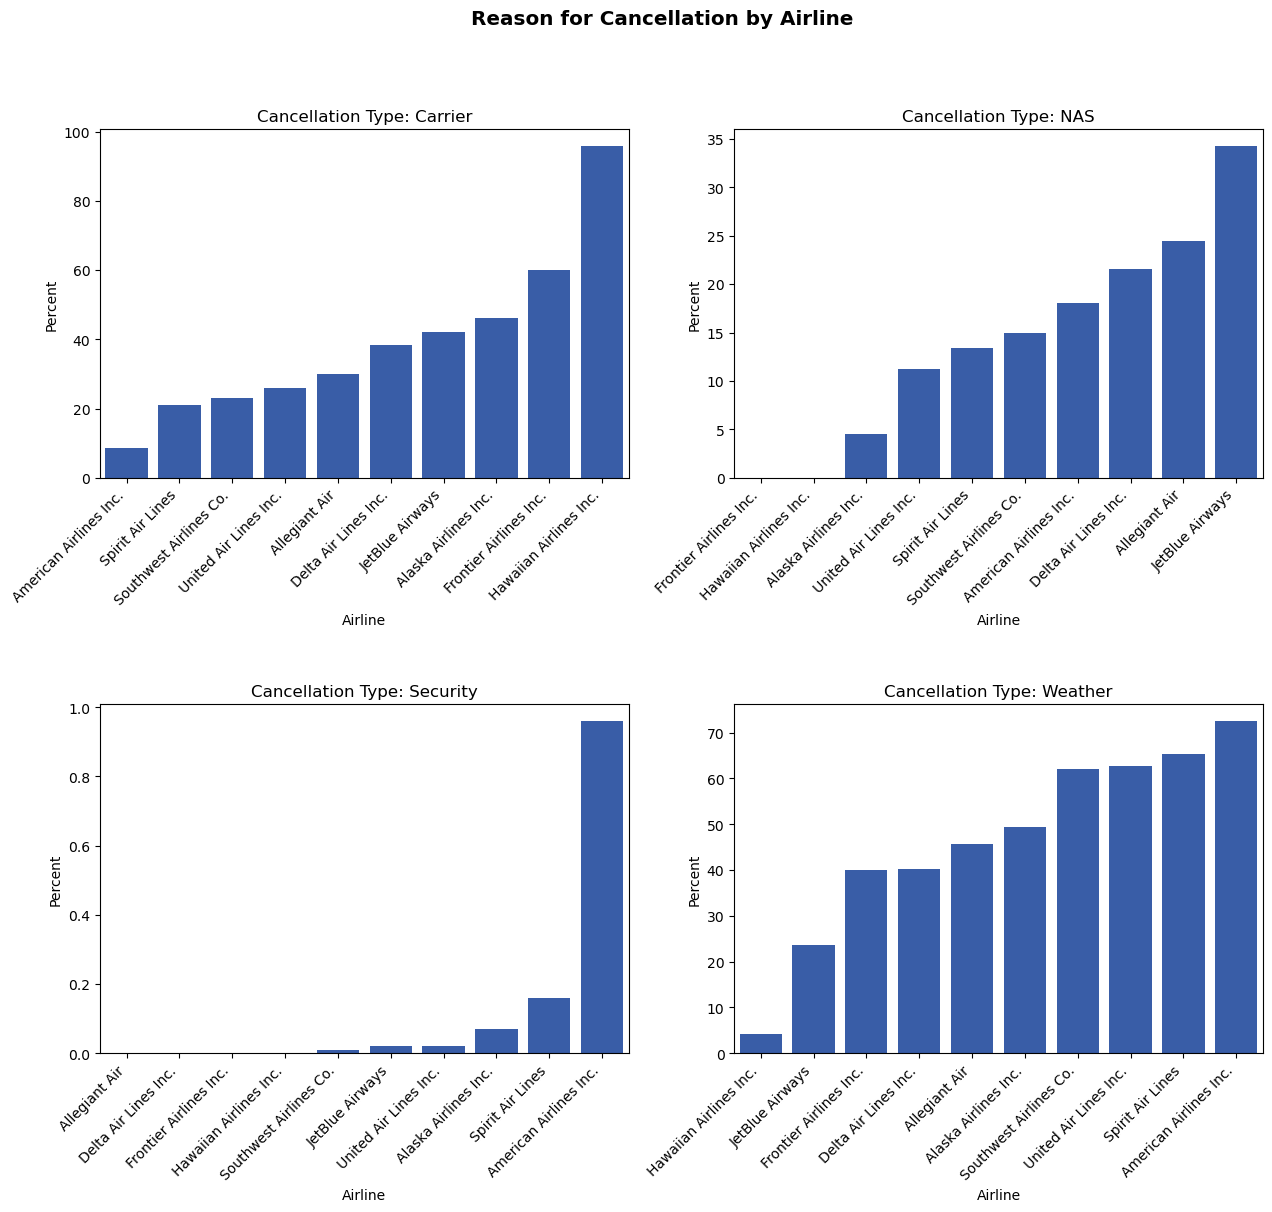

In [57]:
# create a bar plot to compare airline flight totals
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15,12))

performance_cols = ['Carrier_cancellations_by_airline', 'NAS_cancellations_by_airline', 'Security_cancellations_by_airline', 'Weather_cancellations_by_airline']

for i, col in enumerate(performance_cols):
    sns.barplot(data=airline_performance_cancelled.sort_values(col), x='airline_mkt', y=col, ax=ax[i // 2, i % 2])
    ax[i // 2, i % 2].set_title(f'Cancellation Type: {col.replace("_", " ").split()[0]}')
    ax[i // 2, i % 2].set_ylabel('Percent')
    ax[i // 2, i % 2].set_xlabel('Airline')
    ax[i // 2, i % 2].set_xticklabels(ax[i // 2, i % 2].get_xticklabels(), rotation=45, ha='right', va='top')

plt.suptitle('Reason for Cancellation by Airline', fontsize='x-large', fontweight='bold')
plt.subplots_adjust(hspace=0.65)
plt.tight_layout(rect=[0, 0, 0, 0.95])
plt.show()

In [58]:
airline_performance = flights.groupby(['airline_mkt', 'arrival_status']).size().reset_index(name='count')
airline_performance = airline_performance.pivot(index='airline_mkt', columns='arrival_status', values='count')
airline_performance

arrival_status,cancelled,delayed,early,on time
airline_mkt,,,,
Alaska Airlines Inc.,2849,69918,229309,83538
Allegiant Air,782,29967,63570,21202
American Airlines Inc.,20573,350632,1093700,293936
Delta Air Lines Inc.,18181,226201,1028856,210966
Frontier Airlines Inc.,3774,54789,88604,30337
Hawaiian Airlines Inc.,1053,19021,34239,26645
JetBlue Airways,5763,84537,142752,41614
Southwest Airlines Co.,14325,312583,798503,312773
Spirit Air Lines,4486,75933,136578,46832


In [59]:
airline_performance_summary = airline_performance.merge(airline_summary, on='airline_mkt', how='inner')
airline_performance_summary = airline_performance_summary.rename_axis(None, axis=1)\
    .rename_axis(None, axis=1).reset_index()
airline_performance_summary = airline_performance_summary.sort_values('perc_completed_flights_by_airline', ascending=False)
airline_performance_summary['cum_sum'] = airline_performance_summary['perc_completed_flights_by_airline'].cumsum(axis=0)
airline_performance_summary

,airline_mkt,cancelled,delayed,early,on time,completed_flights,perc_completed_flights_by_airline,all_flights,cum_sum
2,American Airlines Inc.,20573,350632,1093700,293936,1738268,24.20,1758841,24.20
3,Delta Air Lines Inc.,18181,226201,1028856,210966,1466023,20.41,1484204,44.61
7,Southwest Airlines Co.,14325,312583,798503,312773,1423859,19.82,1438184,64.43
9,United Air Lines Inc.,22111,256990,807823,210745,1275558,17.76,1297669,82.19
0,Alaska Airlines Inc.,2849,69918,229309,83538,382765,5.33,385614,87.52
6,JetBlue Airways,5763,84537,142752,41614,268903,3.74,274666,91.26
8,Spirit Air Lines,4486,75933,136578,46832,259343,3.61,263829,94.87
4,Frontier Airlines Inc.,3774,54789,88604,30337,173730,2.42,177504,97.29
1,Allegiant Air,782,29967,63570,21202,114739,1.60,115521,98.89
5,Hawaiian Airlines Inc.,1053,19021,34239,26645,79905,1.11,80958,100.00


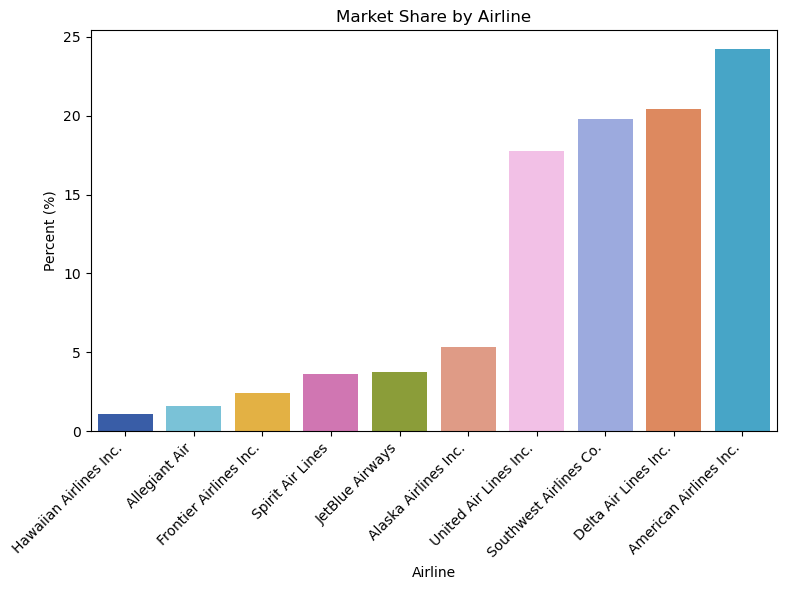

In [60]:
# create a bar plot to look  at market share by airline
fig, ax = plt.subplots(figsize=(8,6))
sns.barplot(data=airline_performance_summary.sort_values('perc_completed_flights_by_airline'), x='airline_mkt', y='perc_completed_flights_by_airline', palette=palette, hue='airline_mkt')
plt.title('Market Share by Airline')
plt.ylabel('Percent (%)')
plt.xlabel('Airline')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [61]:
performance_cols = ['cancelled', 'delayed', 'early', 'on time', 'completed_flights']

for col in performance_cols:
    new_col = f'{col}_rate_by_airline'
    airline_performance_summary[new_col] = round(airline_performance_summary[col] / airline_performance_summary['all_flights'] * 100, 2)

In [62]:
airline_performance_summary

,airline_mkt,cancelled,delayed,early,on time,completed_flights,perc_completed_flights_by_airline,all_flights,cum_sum,cancelled_rate_by_airline,delayed_rate_by_airline,early_rate_by_airline,on time_rate_by_airline,completed_flights_rate_by_airline
2,American Airlines Inc.,20573,350632,1093700,293936,1738268,24.20,1758841,24.20,1.17,19.94,62.18,16.71,98.83
3,Delta Air Lines Inc.,18181,226201,1028856,210966,1466023,20.41,1484204,44.61,1.22,15.24,69.32,14.21,98.78
7,Southwest Airlines Co.,14325,312583,798503,312773,1423859,19.82,1438184,64.43,1.00,21.73,55.52,21.75,99.00
9,United Air Lines Inc.,22111,256990,807823,210745,1275558,17.76,1297669,82.19,1.70,19.80,62.25,16.24,98.30
0,Alaska Airlines Inc.,2849,69918,229309,83538,382765,5.33,385614,87.52,0.74,18.13,59.47,21.66,99.26
6,JetBlue Airways,5763,84537,142752,41614,268903,3.74,274666,91.26,2.10,30.78,51.97,15.15,97.90
8,Spirit Air Lines,4486,75933,136578,46832,259343,3.61,263829,94.87,1.70,28.78,51.77,17.75,98.30
4,Frontier Airlines Inc.,3774,54789,88604,30337,173730,2.42,177504,97.29,2.13,30.87,49.92,17.09,97.87
1,Allegiant Air,782,29967,63570,21202,114739,1.60,115521,98.89,0.68,25.94,55.03,18.35,99.32
5,Hawaiian Airlines Inc.,1053,19021,34239,26645,79905,1.11,80958,100.00,1.30,23.49,42.29,32.91,98.70


In [63]:
airline_performance_summary['dominant_airline'] = np.where(airline_performance_summary['perc_completed_flights_by_airline'] > 15, 'Dominant', 'Not Dominant')

/var/folders/b2/nkpmrw0s42q_zm32rwshljyr0000gn/T/ipykernel_53549/3116895051.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0,0].set_xticklabels(ax[0,0].get_xticklabels(), rotation=45, ha='right', va='top')
/var/folders/b2/nkpmrw0s42q_zm32rwshljyr0000gn/T/ipykernel_53549/3116895051.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0,1].set_xticklabels(ax[0,1].get_xticklabels(), rotation=45, ha='right', va='top')
/var/folders/b2/nkpmrw0s42q_zm32rwshljyr0000gn/T/ipykernel_53549/3116895051.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1,0].set_xticklabels(ax[1,0].get_xticklabels(), rotation=45, ha='right', va='top')
/var/folders/b2/nkpmrw0s42q_zm32rwshljyr0000gn/T/ipykernel_53549/3116895051.py:29: UserWarning: set_tick

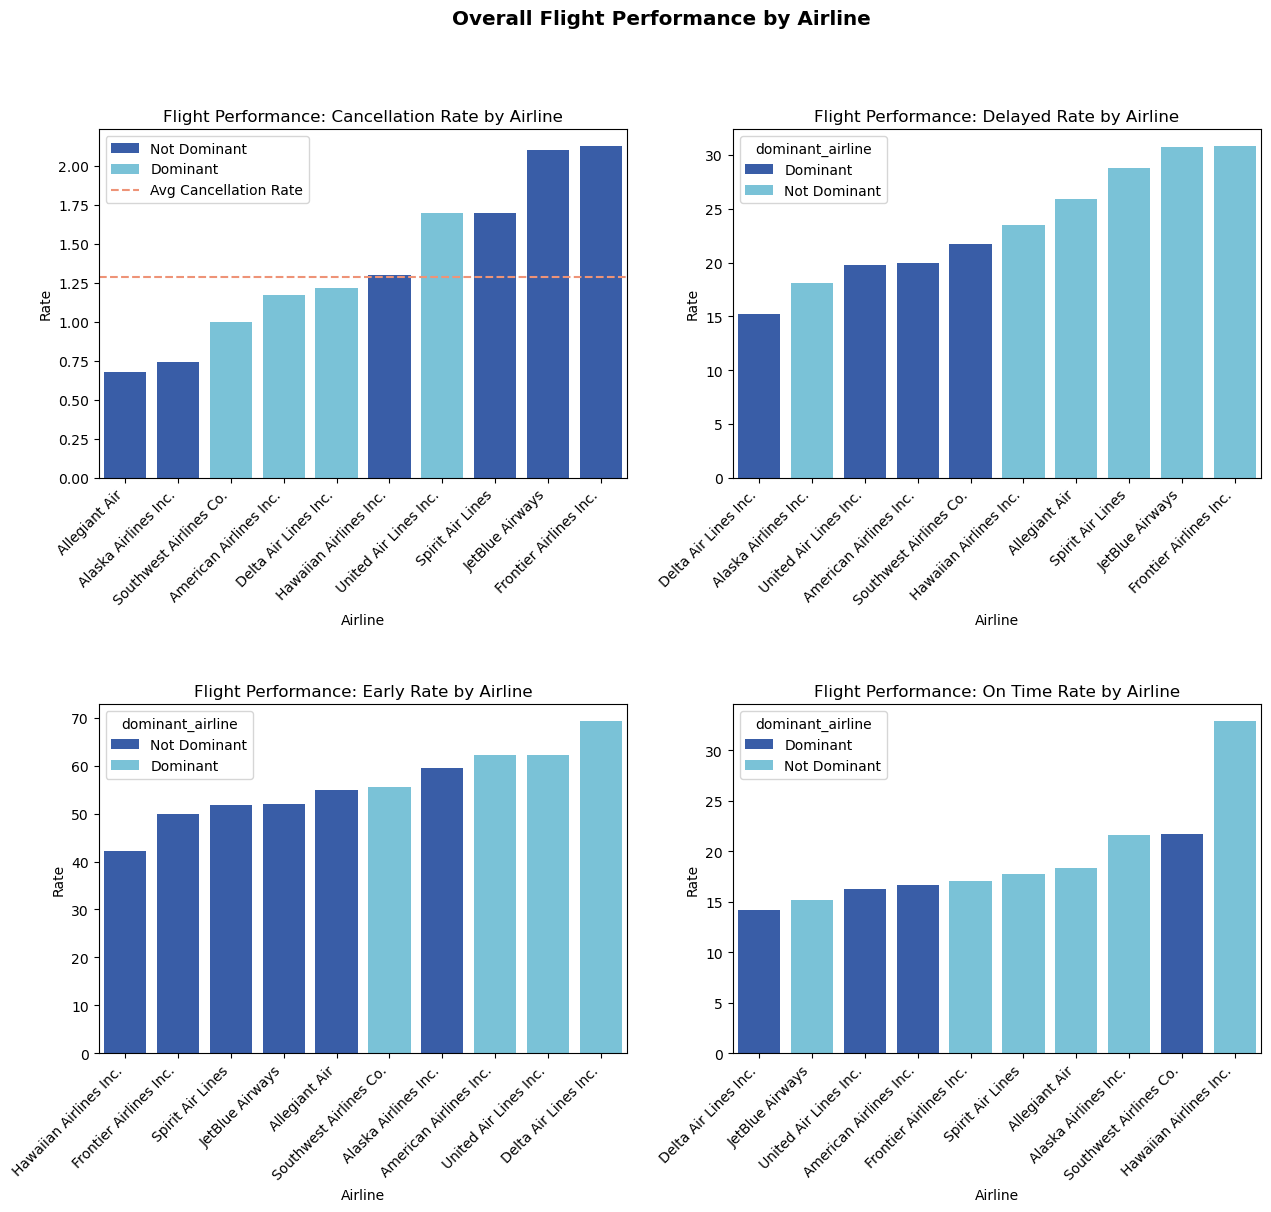

In [64]:
# create a bar plot to compare airline flight totals
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15,12))

sns.barplot(data=airline_performance_summary.sort_values('cancelled_rate_by_airline'), x='airline_mkt', y='cancelled_rate_by_airline', ax=ax[0,0], hue='dominant_airline')
ax[0,0].set_title(f'Flight Performance: Cancellation Rate by Airline')
ax[0,0].set_ylabel('Rate')
ax[0,0].set_xlabel('Airline')
ax[0,0].set_xticklabels(ax[0,0].get_xticklabels(), rotation=45, ha='right', va='top')
ax[0,0].axhline(y=(flights['cancelled'].mean()*100), linestyle='--', color=palette[5], label='Avg Cancellation Rate')
ax[0,0].legend()


sns.barplot(data=airline_performance_summary.sort_values('delayed_rate_by_airline'), x='airline_mkt', y='delayed_rate_by_airline', ax=ax[0,1], hue='dominant_airline')
ax[0,1].set_title(f'Flight Performance: Delayed Rate by Airline')
ax[0,1].set_ylabel('Rate')
ax[0,1].set_xlabel('Airline')
ax[0,1].set_xticklabels(ax[0,1].get_xticklabels(), rotation=45, ha='right', va='top')

sns.barplot(data=airline_performance_summary.sort_values('early_rate_by_airline'), x='airline_mkt', y='early_rate_by_airline', ax=ax[1,0], hue='dominant_airline')
ax[1,0].set_title(f'Flight Performance: Early Rate by Airline')
ax[1,0].set_ylabel('Rate')
ax[1,0].set_xlabel('Airline')
ax[1,0].set_xticklabels(ax[1,0].get_xticklabels(), rotation=45, ha='right', va='top')

sns.barplot(data=airline_performance_summary.sort_values('on time_rate_by_airline'), x='airline_mkt', y='on time_rate_by_airline', ax=ax[1,1], hue='dominant_airline')
ax[1,1].set_title(f'Flight Performance: On Time Rate by Airline')
ax[1,1].set_ylabel('Rate')
ax[1,1].set_xlabel('Airline')
ax[1,1].set_xticklabels(ax[1,1].get_xticklabels(), rotation=45, ha='right', va='top')

plt.suptitle('Overall Flight Performance by Airline', fontsize='x-large', fontweight='bold')
plt.subplots_adjust(hspace=0.65)
plt.tight_layout(rect=[0, 0, 0, 0.95])
plt.show()

/var/folders/b2/nkpmrw0s42q_zm32rwshljyr0000gn/T/ipykernel_53549/104778816.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', va='top')


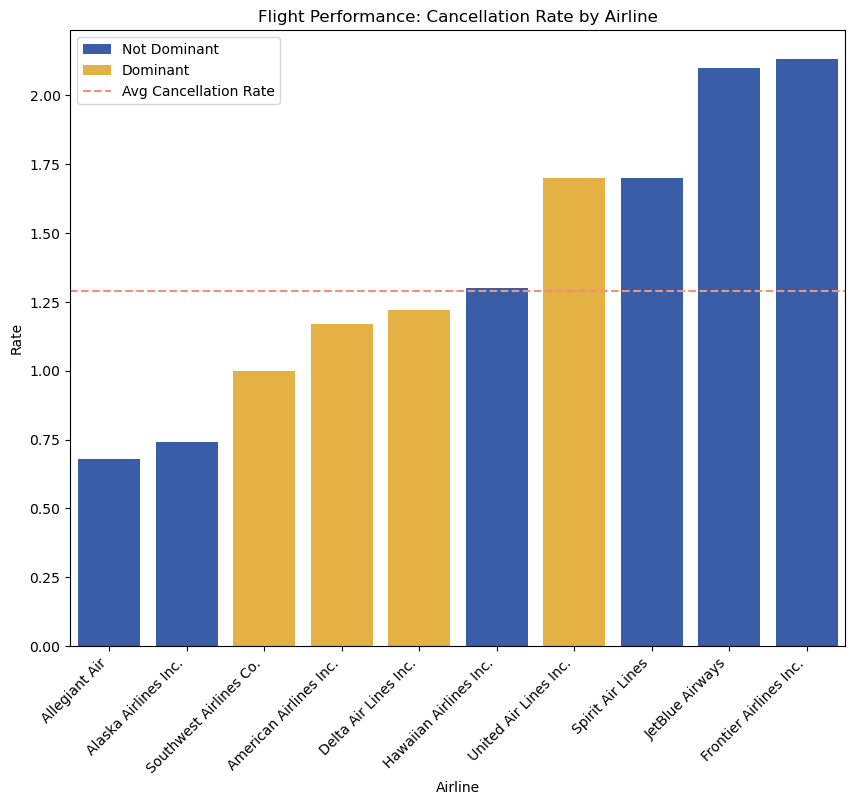

In [146]:
fig, ax = plt.subplots(figsize=(10,8))

sns.barplot(data=airline_performance_summary.sort_values('cancelled_rate_by_airline'), x='airline_mkt', y='cancelled_rate_by_airline', hue='dominant_airline', palette=(palette[0], palette[2]))
ax.set_title(f'Flight Performance: Cancellation Rate by Airline')
ax.set_ylabel('Rate')
ax.set_xlabel('Airline')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', va='top')
ax.axhline(y=(flights['cancelled'].mean()*100), linestyle='--', color=palette[5], label='Avg Cancellation Rate')
ax.legend()

In [66]:
from scipy import stats 
# Perform ANOVA test for cancellation rates among airlines
anova_result = stats.f_oneway(*[flights[flights['airline_mkt'] == airline]['cancelled'] for airline in flights['airline_mkt'].unique()])
print(f"F-statistic: {anova_result.statistic:.2f}, P-value: {anova_result.pvalue:.4f}")

if anova_result.pvalue < 0.05:
    print("There is a significant difference in cancellation rates among airlines.")
else:
    print("No significant difference in cancellation rates among airlines.")


F-statistic: 774.37, P-value: 0.0000
There is a significant difference in cancellation rates among airlines.


In [67]:
# Number of tests
num_tests = len(flights['airline_mkt'].unique())
alpha = 0.05
alpha_adjusted = alpha / num_tests

overall_cancellation_rate = flights['cancelled'].mean()

# Run the tests and adjust p-values using Bonferroni correction
for airline in flights['airline_mkt'].unique():
    airline_cancellations = flights[flights['airline_mkt'] == airline]['cancelled']
    t_stat, p_value = stats.ttest_1samp(airline_cancellations, overall_cancellation_rate)

    if p_value < alpha_adjusted:
        print(f"Airline: {airline}, P-value: {p_value:.4f} (Significant after Bonferroni correction)")
    else:
        print(f"Airline: {airline}, P-value: {p_value:.4f} (Not significant after Bonferroni correction)")


Airline: Spirit Air Lines, P-value: 0.0000 (Significant after Bonferroni correction)
Airline: American Airlines Inc., P-value: 0.0000 (Significant after Bonferroni correction)
Airline: Delta Air Lines Inc., P-value: 0.0000 (Significant after Bonferroni correction)
Airline: United Air Lines Inc., P-value: 0.0000 (Significant after Bonferroni correction)
Airline: Alaska Airlines Inc., P-value: 0.0000 (Significant after Bonferroni correction)
Airline: JetBlue Airways, P-value: 0.0000 (Significant after Bonferroni correction)
Airline: Frontier Airlines Inc., P-value: 0.0000 (Significant after Bonferroni correction)
Airline: Allegiant Air, P-value: 0.0000 (Significant after Bonferroni correction)
Airline: Hawaiian Airlines Inc., P-value: 0.7950 (Not significant after Bonferroni correction)
Airline: Southwest Airlines Co., P-value: 0.0000 (Significant after Bonferroni correction)


In [68]:
airline_cancellation_performance = {
    'Spirit Air Lines': 'above average',
    'United Air Lines Inc.': 'above average',
    'Frontier Airlines Inc.': 'above average',
    'JetBlue Airways': 'above average',
    'Hawaiian Airlines Inc.': 'average',
    'American Airlines Inc.': 'below average',
    'Delta Air Lines Inc.': 'below average',
    'Alaska Airlines Inc.': 'below average',
    'Allegiant Air': 'below average',
    'Southwest Airlines Co.': 'below average'
}

flights['airline_cancellation_performance'] = flights['airline_mkt'].map(airline_cancellation_performance)

In [137]:
palette

[(0.15294117647058825, 0.3411764705882353, 0.7254901960784313),
 (0.4196078431372549, 0.796078431372549, 0.9019607843137255),
 (0.996078431372549, 0.7333333333333333, 0.1607843137254902),
 (0.8745098039215686, 0.403921568627451, 0.7176470588235294),
 (0.5843137254901961, 0.6823529411764706, 0.1568627450980392),
 (0.9333333333333333, 0.5764705882352941, 0.4666666666666667),
 (0.9803921568627451, 0.7215686274509804, 0.9215686274509803),
 (0.5686274509803921, 0.6431372549019608, 0.9137254901960784),
 (0.9490196078431372, 0.5098039215686274, 0.2901960784313726),
 (0.19607843137254902, 0.6862745098039216, 0.8627450980392157)]

/var/folders/b2/nkpmrw0s42q_zm32rwshljyr0000gn/T/ipykernel_53549/741184650.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', va='top')


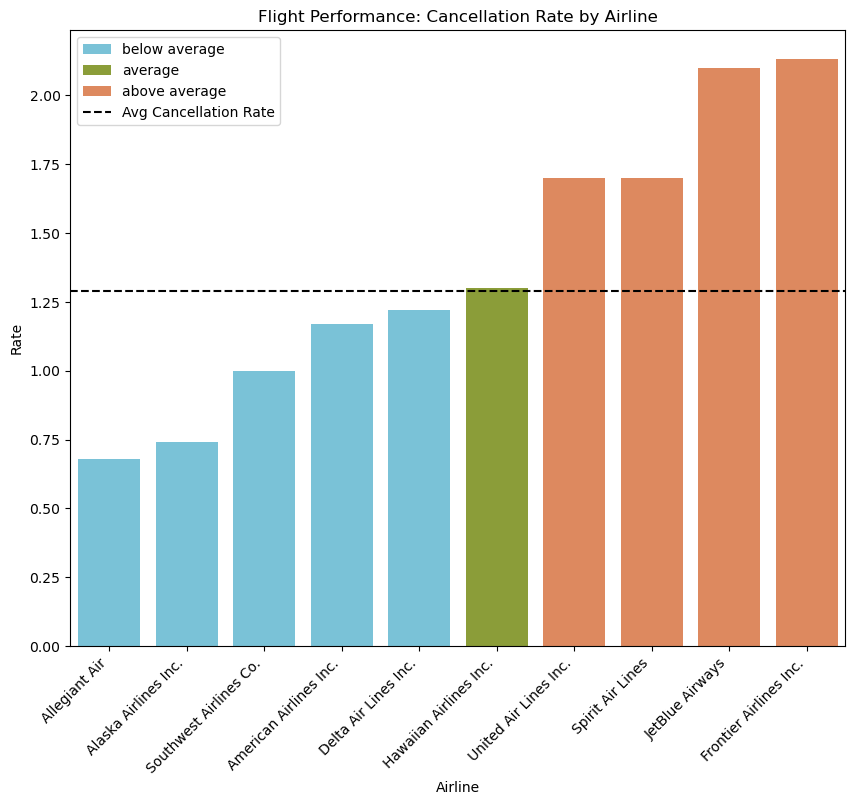

In [144]:
airline_performance_summary['airline_cancellation_performance'] = airline_performance_summary['airline_mkt'].map(airline_cancellation_performance)

fig, ax = plt.subplots(figsize=(10,8))

sns.barplot(data=airline_performance_summary.sort_values('cancelled_rate_by_airline'), x='airline_mkt', y='cancelled_rate_by_airline', hue='airline_cancellation_performance', palette=(palette[1], palette[4], palette[8]))
ax.set_title(f'Flight Performance: Cancellation Rate by Airline')
ax.set_ylabel('Rate')
ax.set_xlabel('Airline')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', va='top')
ax.axhline(y=(flights['cancelled'].mean()*100), linestyle='--', color='black', label='Avg Cancellation Rate')
ax.legend()

In [69]:
flights[['airline_mkt', 'airline_cancellation_performance']].head()

,airline_mkt,airline_cancellation_performance
0,Spirit Air Lines,above average
1,Spirit Air Lines,above average
2,Spirit Air Lines,above average
3,Spirit Air Lines,above average
4,Spirit Air Lines,above average


#### Code Share Flights

In [70]:
airline_operators_sumamry = flights.groupby('airline_ops').agg(
    flight_counts=('airline_ops', 'size'),
    market_share=('airline_ops', lambda x: round(len(x)/total_completed_flights * 100, 2)),
    total_cancellations=('cancelled', 'sum')
    )

In [71]:
flights['code_share_flight'].value_counts(normalize=True)

code_share_flight
0    0.721886
1    0.278114
Name: proportion, dtype: float64

In [72]:
flights.groupby('code_share_flight')['cancelled'].mean()

code_share_flight
0    0.011883
1    0.015551
Name: cancelled, dtype: float64

Code share flights are more likely to get cancelled. Let's see if this is statistically significant.

In [73]:
print('The total number of airline operators is: ', flights['airline_ops'].nunique())

The total number of airline operators is:  21


In [74]:
airline_operators_sumamry['cancellation_rate_by_airline'] = round(airline_operators_sumamry['total_cancellations'] / airline_operators_sumamry['flight_counts'] * 100, 2)
airline_operators_sumamry.sort_values('cancellation_rate_by_airline', ascending=False)

,flight_counts,market_share,total_cancellations,cancellation_rate_by_airline
airline_ops,,,,
GoJet Airlines LLC d/b/a United Express,45052,0.63,1474,3.27
Republic Airline,295607,4.12,8160,2.76
Frontier Airlines Inc.,177504,2.47,3774,2.13
Endeavor Air Inc.,201493,2.81,4233,2.10
JetBlue Airways,274666,3.82,5763,2.10
Mesa Airlines Inc.,88676,1.23,1767,1.99
Spirit Air Lines,263829,3.67,4486,1.70
CommuteAir LLC dba CommuteAir,70804,0.99,1027,1.45
United Air Lines Inc.,732078,10.19,10270,1.40


In [75]:
round(airline_operators_sumamry['cancellation_rate_by_airline'].mean(), 4)

1.4752

In [76]:
airline_operators = flights.groupby(['airline_mkt', 'cancelled']).agg(
    num_codeshare=('code_share_flight','sum'),
    num_flights=('airline_mkt', 'count'))
airline_operators['perc_code_share'] = round(airline_operators['num_codeshare'] / airline_operators['num_flights'] *100, 2)
airline_operators

num_codeshare  num_flights  perc_code_share
airline_mkt            cancelled                                             
Alaska Airlines Inc.   0                 139610       382765            36.47
                       1                    872         2849            30.61
Allegiant Air          0                      0       114739             0.00
                       1                      0          782             0.00
American Airlines Inc. 0                 807851      1738268            46.47
                       1                  10595        20573            51.50
Delta Air Lines Inc.   0                 491152      1466023            33.50
                       1                   8165        18181            44.91
Frontier Airlines Inc. 0                      0       173730             0.00
                       1                      0         3774             0.00
Hawaiian Airlines Inc. 0                      0        79905             0.00
                       1                      0         1053             0.00
JetBlue Airways        0                      0       268903             0.00
                       1                      0         5763             0.00
Southwest Airlines Co. 0                      0      1423859             0.00
                       1                      0        14325             0.00
Spirit Air Lines       0                      0       259343             0.00
                       1                      0         4486             0.00
United Air Lines Inc.  0                 553750      1275558            43.41
                       1                  11841        22111            53.55

In [77]:
mask = flights['airline_ops'] != flights['airline_mkt']
mkt_code_share_partners = flights[mask].groupby(['airline_mkt', 'airline_ops'])['airline_ops'].size()
mkt_code_share_partners

airline_mkt             airline_ops                            
Alaska Airlines Inc.    Horizon Air                                 68564
                        SkyWest Airlines Inc.                       71918
American Airlines Inc.  Air Wisconsin Airlines Corp                 37674
                        Envoy Air                                  227484
                        Mesa Airlines Inc.                           9611
                        PSA Airlines Inc.                          194161
                        Piedmont Airlines                           99029
                        Republic Airline                           129822
                        SkyWest Airlines Inc.                      120665
Delta Air Lines Inc.    Endeavor Air Inc.                          201493
                        Republic Airline                            82960
                        SkyWest Airlines Inc.                      214864
United Air Lines Inc.   Air Wisconsin Airlines C

In [78]:
mask = flights['airline_ops'] != flights['airline_mkt']
airline_operators = flights[mask].groupby(['airline_ops', 'airline_mkt'])['airline_ops'].size()
airline_operators

airline_ops                              airline_mkt           
Air Wisconsin Airlines Corp              American Airlines Inc.     37674
                                         United Air Lines Inc.      20398
CommuteAir LLC dba CommuteAir            United Air Lines Inc.      70804
Endeavor Air Inc.                        Delta Air Lines Inc.      201493
Envoy Air                                American Airlines Inc.    227484
GoJet Airlines LLC d/b/a United Express  United Air Lines Inc.      45052
Horizon Air                              Alaska Airlines Inc.       68564
Mesa Airlines Inc.                       American Airlines Inc.      9611
                                         United Air Lines Inc.      79065
PSA Airlines Inc.                        American Airlines Inc.    194161
Piedmont Airlines                        American Airlines Inc.     99029
Republic Airline                         American Airlines Inc.    129822
                                         Delta A

In [79]:
code_share_partners = flights.groupby('airline_mkt')['airline_ops'].nunique().reset_index(name='count')
code_share_partners['partners_count'] = code_share_partners['count'] - 1
code_share_partners.drop(columns='count').sort_values('partners_count', ascending=False)

,airline_mkt,partners_count
2,American Airlines Inc.,7
9,United Air Lines Inc.,6
3,Delta Air Lines Inc.,3
0,Alaska Airlines Inc.,2
1,Allegiant Air,0
4,Frontier Airlines Inc.,0
5,Hawaiian Airlines Inc.,0
6,JetBlue Airways,0
7,Southwest Airlines Co.,0
8,Spirit Air Lines,0


**Flights by Airline Summary**

### Temporal Affects on Flight Performance

In [80]:
monthly_performance = flights.groupby(['month', 'arrival_status']).size().reset_index(name='count')
monthly_performance = monthly_performance.pivot(index='month', columns='arrival_status', values='count')
monthly_performance = monthly_performance.rename_axis(None, axis=1).rename_axis(None, axis=1)
monthly_performance['total_flights'] = flights.groupby('month').size()

performance_cols = ['cancelled', 'delayed', 'early', 'on time']

for col in performance_cols:
    new_col = f'{col}_rate_by_month'
    monthly_performance[new_col] = round(monthly_performance[col] / monthly_performance['total_flights'] * 100, 2)

monthly_performance

,cancelled,delayed,early,on time,total_flights,cancelled_rate_by_month,delayed_rate_by_month,early_rate_by_month,on time_rate_by_month
month,,,,,,,,,
1,11032,125529,336278,100795,573634,1.92,21.88,58.62,17.57
2,9686,100348,334506,91526,536066,1.81,18.72,62.40,17.07
3,7847,143858,343852,120498,616055,1.27,23.35,55.82,19.56
4,10323,134644,341351,110174,596492,1.73,22.57,57.23,18.47
5,3833,111740,393780,107198,616551,0.62,18.12,63.87,17.39
6,12856,162825,324060,113639,613380,2.10,26.55,52.83,18.53
7,15875,177984,333683,111292,638834,2.48,27.86,52.23,17.42
8,9475,136586,384971,109101,640133,1.48,21.34,60.14,17.04
9,7492,111847,381617,103671,604627,1.24,18.50,63.12,17.15


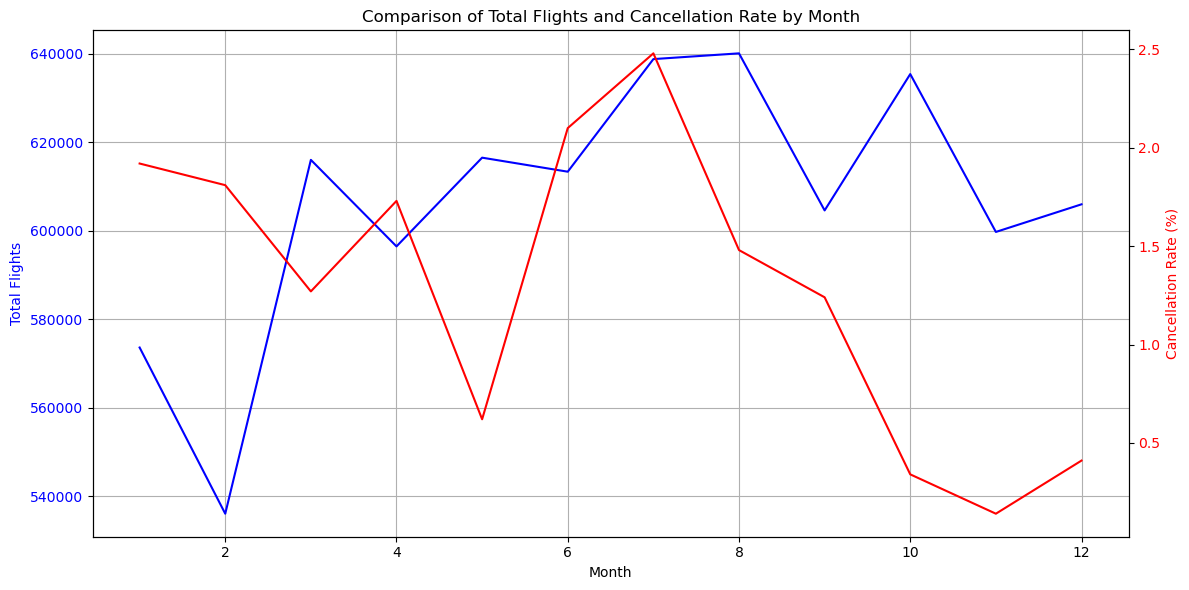

In [81]:
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot total flights
ax1.set_xlabel('Month')
ax1.set_ylabel('Total Flights', color='blue')
ax1.plot(monthly_performance.index, monthly_performance['total_flights'], color='blue', label='Total Flights')
ax1.tick_params(axis='y', labelcolor='blue')

# Second y-axis for the cancellation rate
ax2 = ax1.twinx()
ax2.set_ylabel('Cancellation Rate (%)', color='red')
ax2.plot(monthly_performance.index, monthly_performance['cancelled_rate_by_month'], color='red', label='Cancellation Rate (%)')
ax2.tick_params(axis='y', labelcolor='red')

plt.title('Comparison of Total Flights and Cancellation Rate by Month')
ax1.grid(True)

fig.tight_layout()
plt.show()


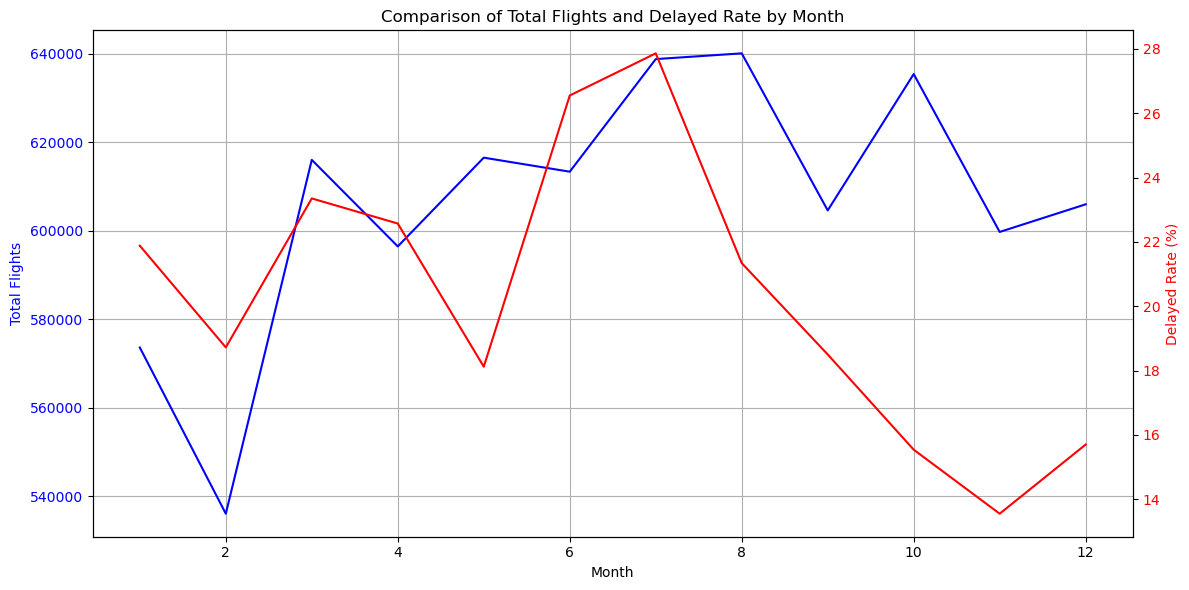

In [82]:
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot total flights
ax1.set_xlabel('Month')
ax1.set_ylabel('Total Flights', color='blue')
ax1.plot(monthly_performance.index, monthly_performance['total_flights'], color='blue', label='Total Flights')
ax1.tick_params(axis='y', labelcolor='blue')

# Second y-axis for the cancellation rate
ax2 = ax1.twinx()
ax2.set_ylabel('Delayed Rate (%)', color='red')
ax2.plot(monthly_performance.index, monthly_performance['delayed_rate_by_month'], color='red', label='Delayed Rate (%)')
ax2.tick_params(axis='y', labelcolor='red')

plt.title('Comparison of Total Flights and Delayed Rate by Month')
ax1.grid(True)

fig.tight_layout()
plt.show()

In [83]:
weekday_performance = flights.groupby(['day_of_week', 'arrival_status']).size().reset_index(name='count')
weekday_performance = weekday_performance.pivot(index='day_of_week', columns='arrival_status', values='count')
weekday_performance = weekday_performance.rename_axis(None, axis=1).rename_axis(None, axis=1)
weekday_performance['total_flights'] = flights.groupby('month').size()

performance_cols = ['cancelled', 'delayed', 'early', 'on time']

for col in performance_cols:
    new_col = f'{col}_rate_by_dow'
    weekday_performance[new_col] = round(weekday_performance[col] / weekday_performance['total_flights'] * 100, 2)

weekday_performance

,cancelled,delayed,early,on time,total_flights,cancelled_rate_by_dow,delayed_rate_by_dow,early_rate_by_dow,on time_rate_by_dow
day_of_week,,,,,,,,,
1,13914,216013,652849,191582,573634,2.43,37.66,113.81,33.40
2,13171,175836,656208,165169,536066,2.46,32.80,122.41,30.81
3,16171,195496,644986,172545,616055,2.62,31.73,104.70,28.01
4,12114,228781,635236,198422,596492,2.03,38.35,106.50,33.26
5,12949,239850,626515,202073,616551,2.10,38.90,101.62,32.77
6,10316,186747,586594,158115,613380,1.68,30.45,95.63,25.78
7,15262,237848,621546,190682,638834,2.39,37.23,97.29,29.85


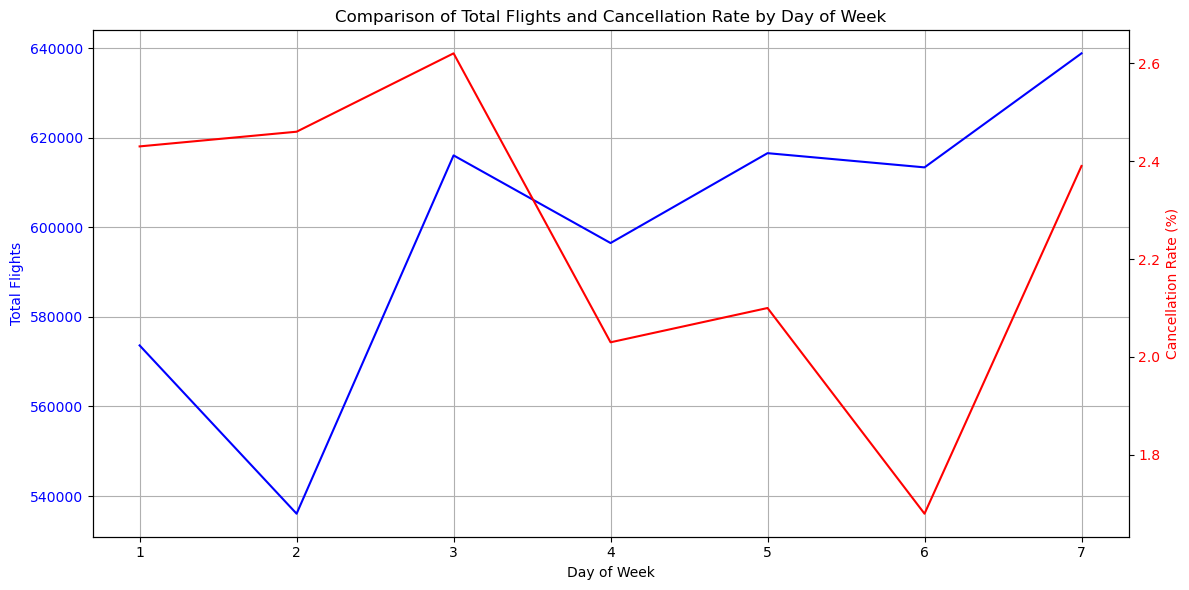

In [84]:
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot total flights
ax1.set_xlabel('Day of Week')
ax1.set_ylabel('Total Flights', color='blue')
ax1.plot(weekday_performance.index, weekday_performance['total_flights'], color='blue', label='Total Flights')
ax1.tick_params(axis='y', labelcolor='blue')

# Second y-axis for the cancellation rate
ax2 = ax1.twinx()
ax2.set_ylabel('Cancellation Rate (%)', color='red')
ax2.plot(weekday_performance.index, weekday_performance['cancelled_rate_by_dow'], color='red', label='Cancellation Rate (%)')
ax2.tick_params(axis='y', labelcolor='red')

plt.title('Comparison of Total Flights and Cancellation Rate by Day of Week')
ax1.grid(True)

fig.tight_layout()
plt.show()


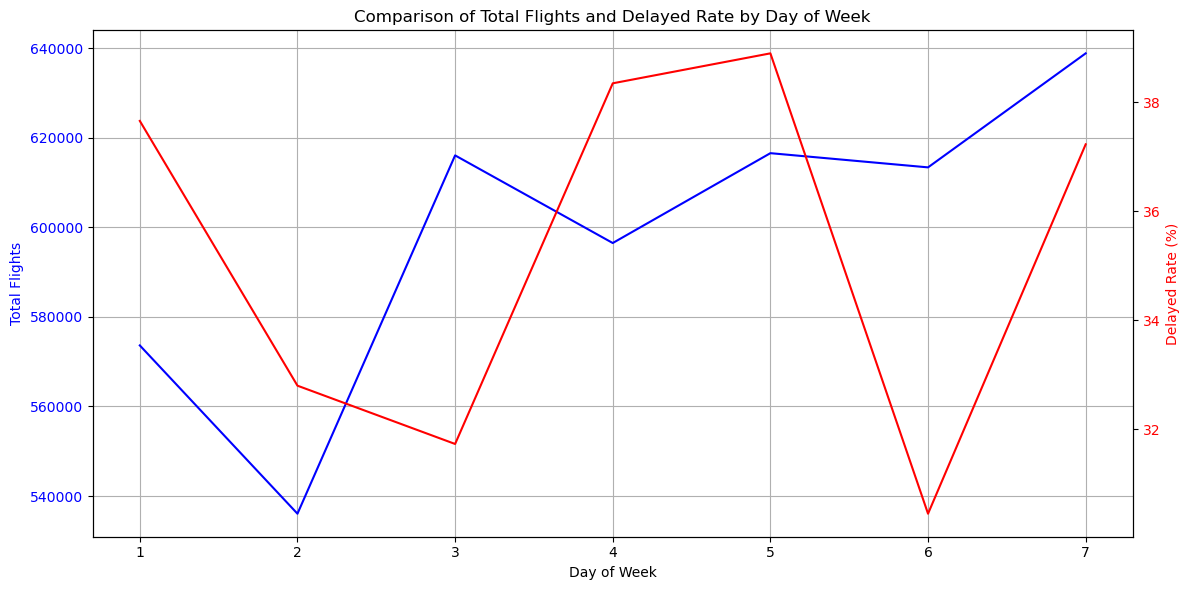

In [85]:
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot total flights
ax1.set_xlabel('Day of Week')
ax1.set_ylabel('Total Flights', color='blue')
ax1.plot(weekday_performance.index, weekday_performance['total_flights'], color='blue', label='Total Flights')
ax1.tick_params(axis='y', labelcolor='blue')

# Second y-axis for the cancellation rate
ax2 = ax1.twinx()
ax2.set_ylabel('Delayed Rate (%)', color='red')
ax2.plot(weekday_performance.index, weekday_performance['delayed_rate_by_dow'], color='red', label='Delayed Rate (%)')
ax2.tick_params(axis='y', labelcolor='red')

plt.title('Comparison of Total Flights and Delayed Rate by Day of Week')
ax1.grid(True)

fig.tight_layout()
plt.show()

In [86]:
def plot_temporal_distribution(df, time_col):
    
    status_types = df['arrival_status'].unique().tolist()
    fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20,12))

    for i, status in enumerate(status_types):
        plot_data = df[df['arrival_status'] == status]
       
        # Group data by time_col and count the number of flights
        grouped_data = plot_data.groupby(time_col)['flight_number_marketing_airline'].size().reset_index(name='flight_count')
        
        sns.barplot(x=grouped_data[time_col], y=grouped_data['flight_count'], ax=ax[i // 2, i % 2])
        
        ax[i // 2, i % 2].set_title(f'{status.title()} Flights Over Time by {time_col.replace("_", " ").title()}')
        ax[i // 2, i % 2].set_ylabel('Number of Flights')
        ax[i // 2, i % 2].set_xlabel(f'{time_col.replace("_", " ").title()}')
        ax[i // 2, i % 2].set(ylim=(0))

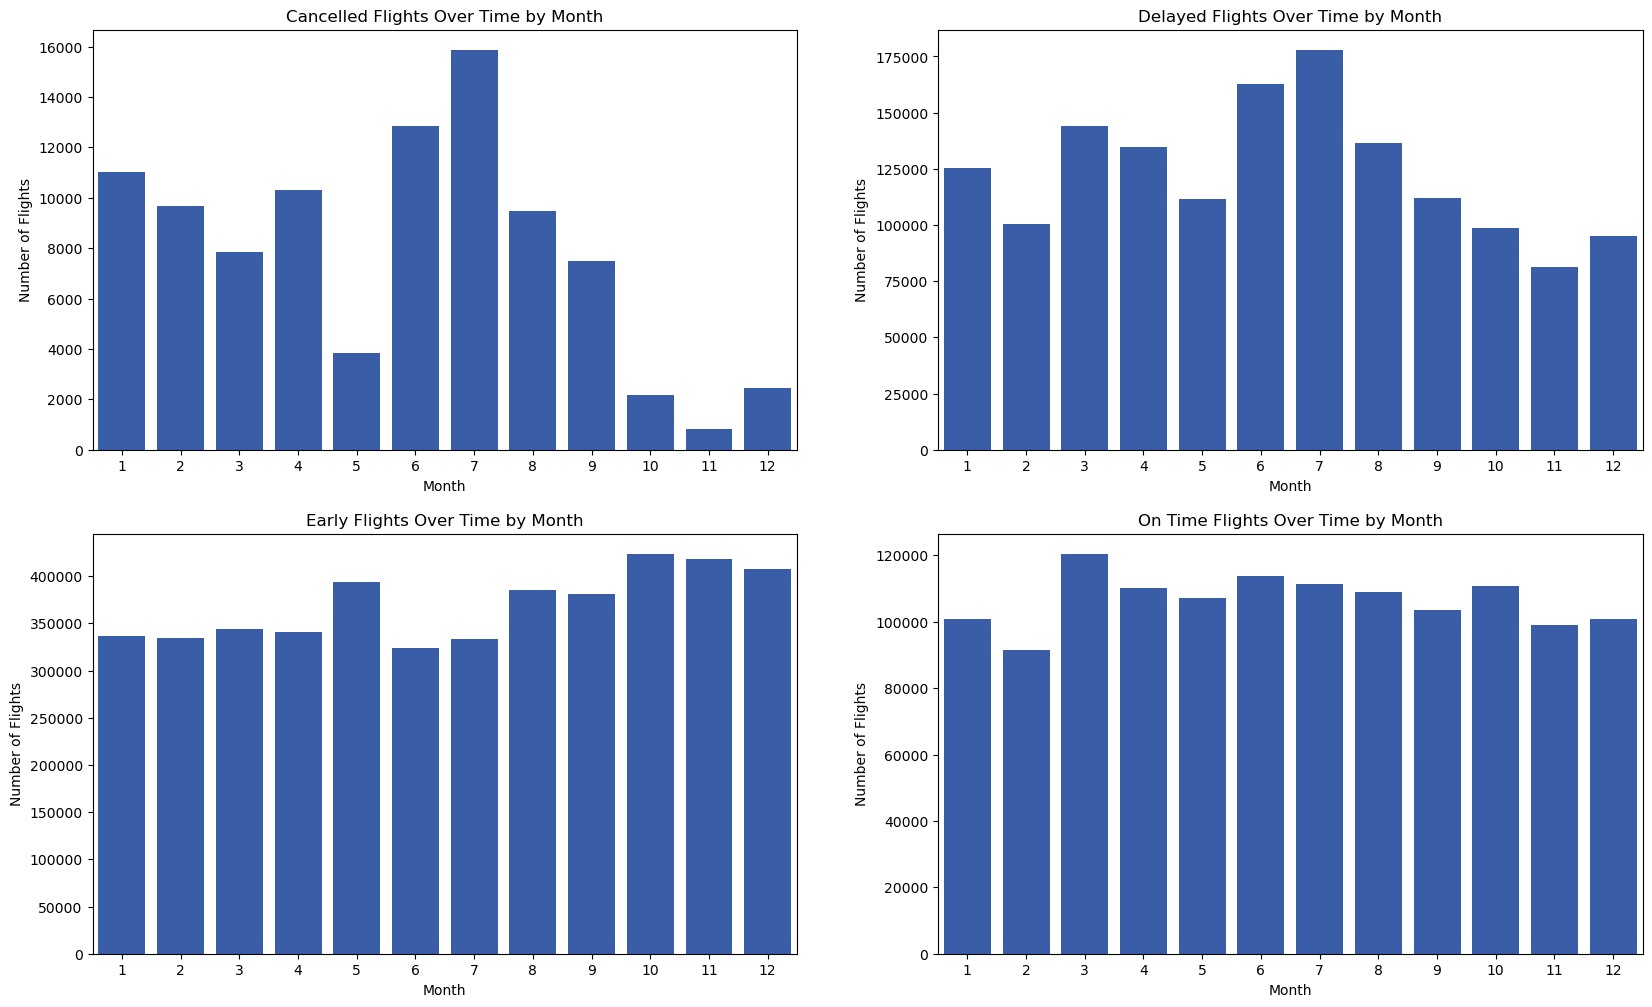

In [87]:
plot_temporal_distribution(flights, 'month')

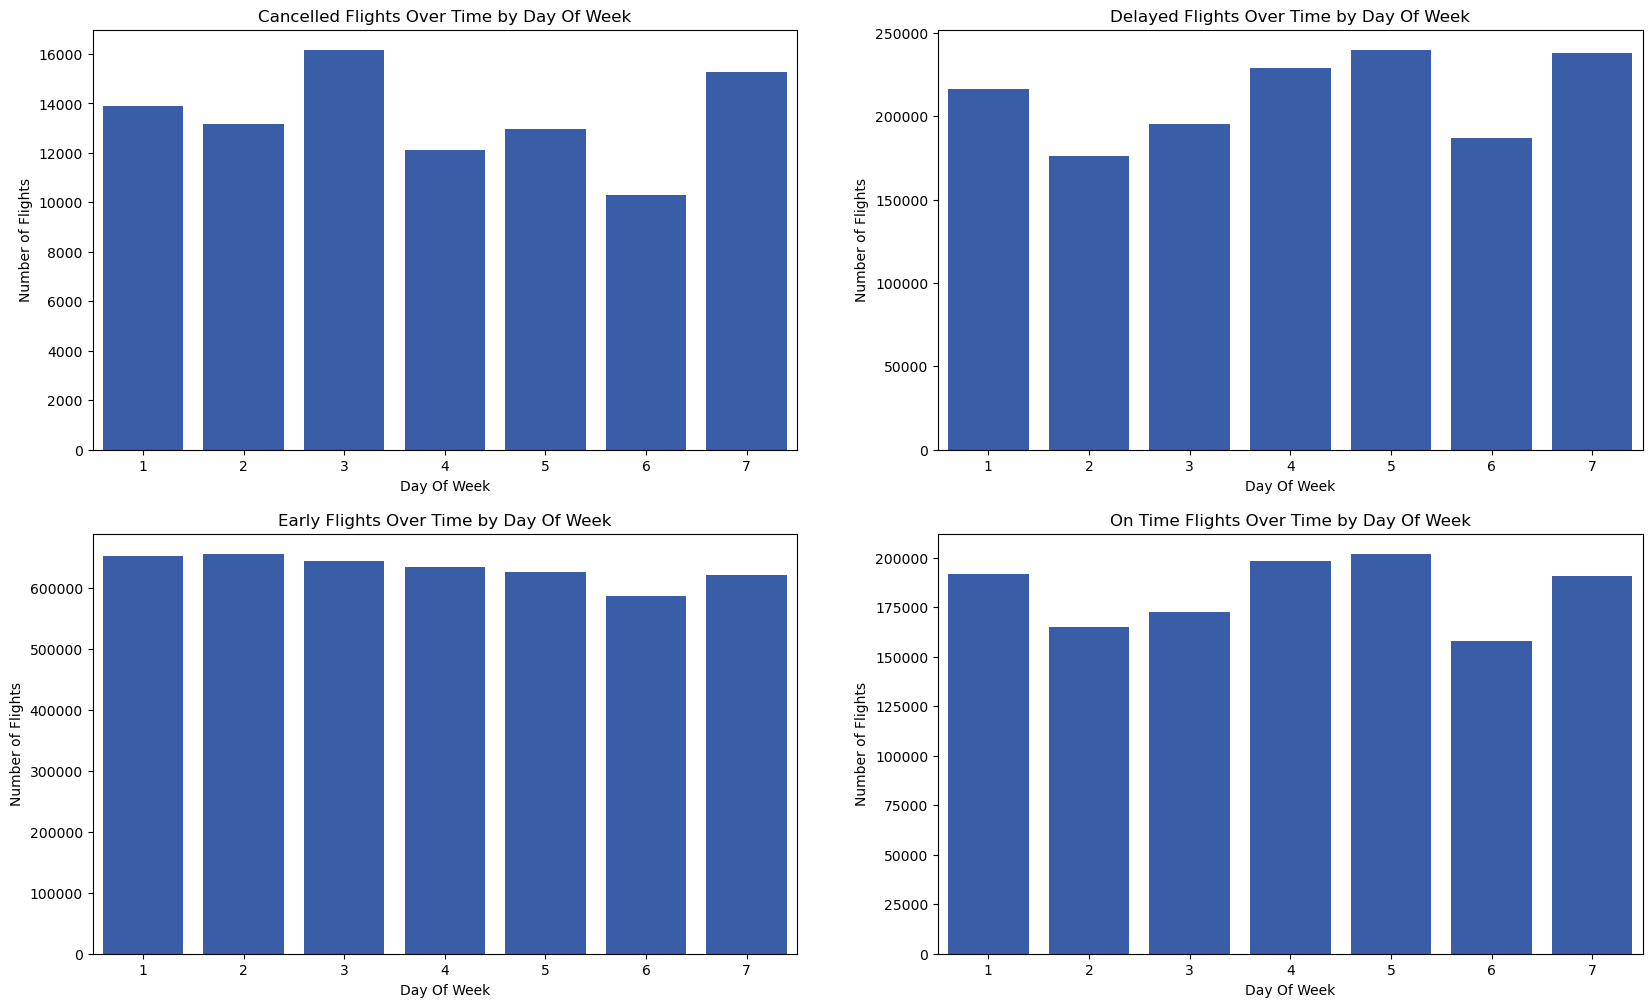

In [88]:
plot_temporal_distribution(flights, 'day_of_week')

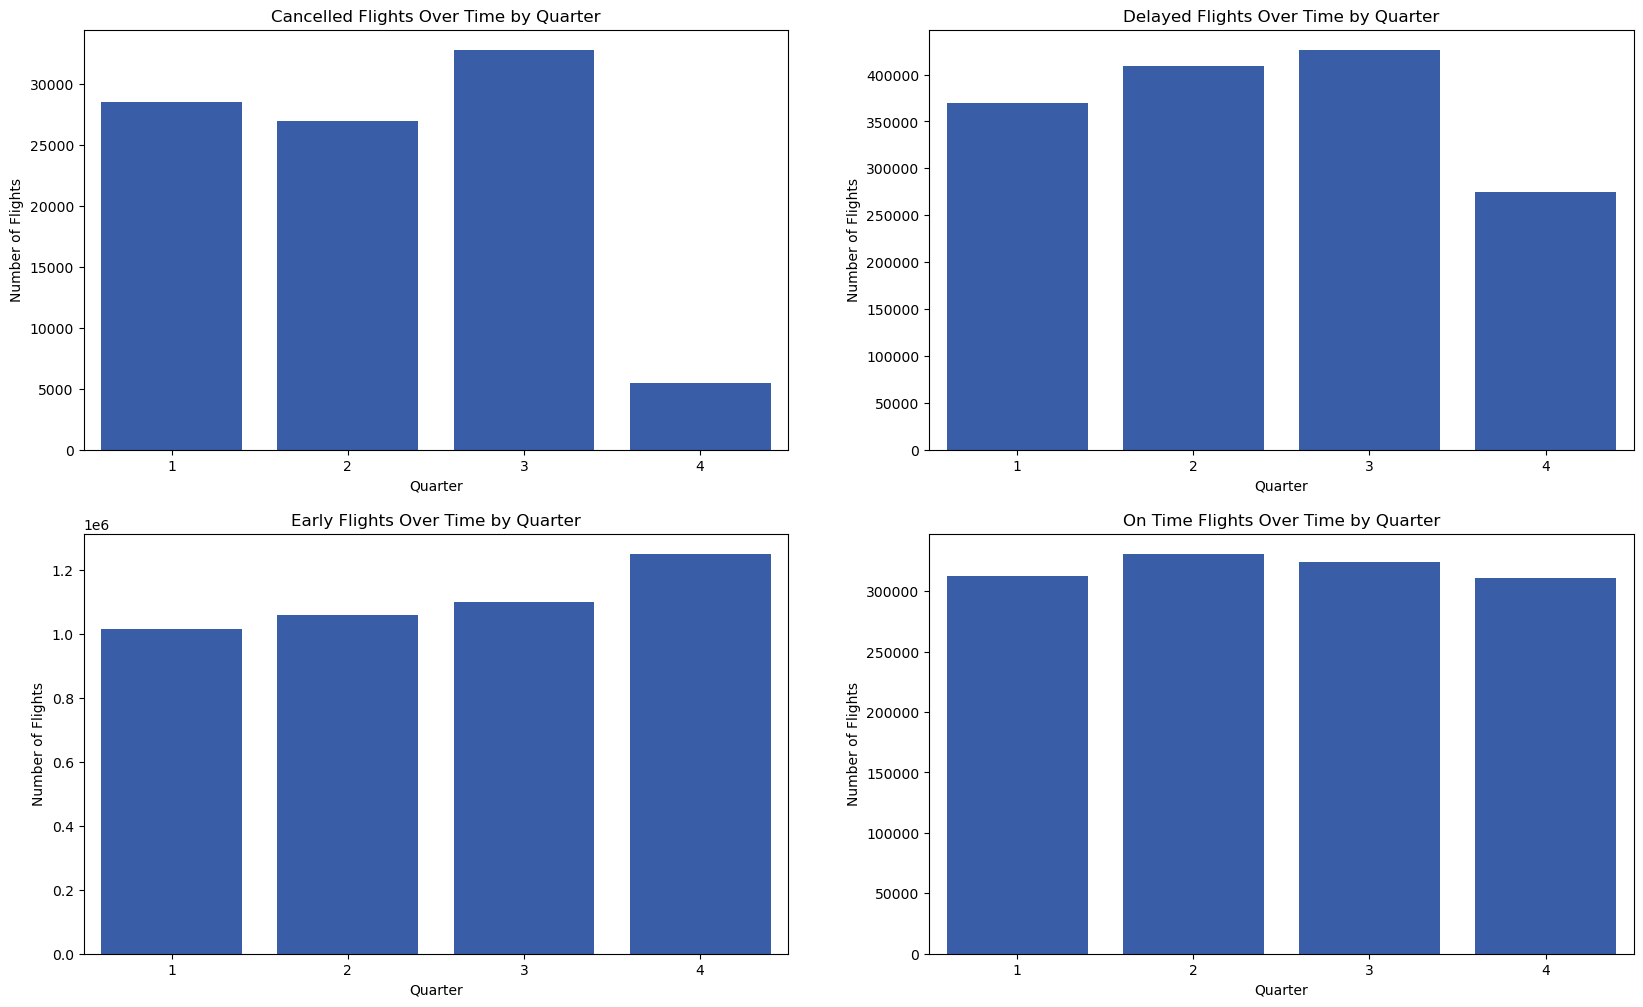

In [89]:
plot_temporal_distribution(flights, 'quarter')

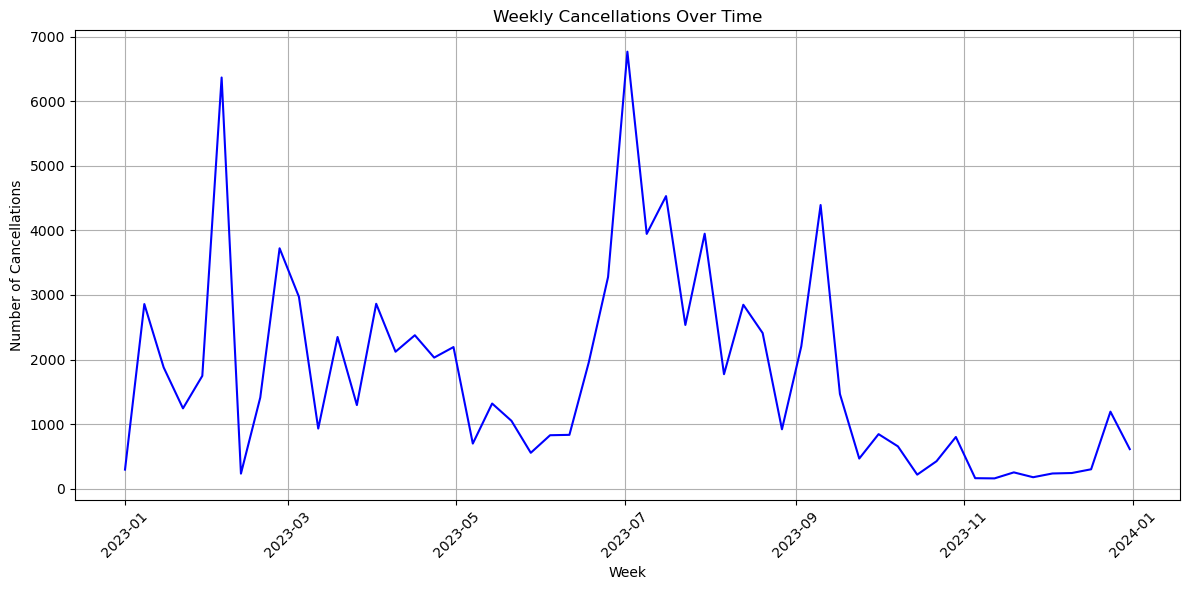

In [90]:
# Resample by week
cancellations_by_week = flights.resample('W', on='scheduled_departure_datetime')['cancelled'].sum()

# Plot the weekly resampled data
plt.figure(figsize=(12, 6))
plt.plot(cancellations_by_week.index, cancellations_by_week.values, color='blue')
plt.title('Weekly Cancellations Over Time')
plt.xlabel('Week')
plt.ylabel('Number of Cancellations')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


In [91]:
# calculate cancellation rates by depature time windows
dep_window_cancellations = flights.groupby('departure_window').agg(
    cancellations=('cancelled', 'sum'),
    total_flights=('cancelled', 'count'))
dep_window_cancellations['cancellation_rate'] = round(dep_window_cancellations['cancellations'] / dep_window_cancellations['total_flights'] * 100, 2)
dep_window_cancellations = dep_window_cancellations.reset_index()
dep_window_cancellations.sort_values('cancellation_rate', ascending=False)

,departure_window,cancellations,total_flights,cancellation_rate
7,night,18443,973808,1.89
4,late night,4429,251408,1.76
3,evening,15134,891987,1.70
0,afternoon,11944,833661,1.43
8,overnight,248,17346,1.43
2,early morning,2533,203811,1.24
1,early afternoon,9643,860877,1.12
6,morning,23431,2354052,1.00
5,midday,8092,890040,0.91


In [92]:
departure_windows = pd.DataFrame({'order':[1,2,3,4,5,6,7,8,9], 
                                  'window_name': ['overnight', 'early morning', 'morning', 'midday', 'early afternoon', 'afternoon', 'evening', 'night', 'late night']})\
                                  .set_index('order')

dep_window_cancellations['departure_window'] = pd.Categorical(
    dep_window_cancellations['departure_window'], 
    categories=departure_windows['window_name'],
    ordered=True
)

dep_window_cancellations = dep_window_cancellations.sort_values('departure_window')

Text(0, 0.5, 'Cancellation Rate (%)')

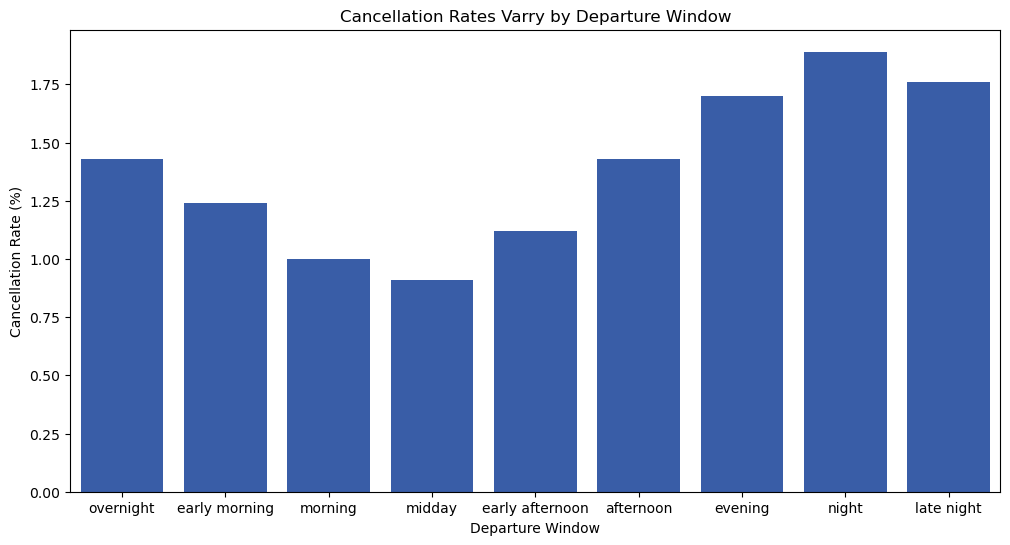

In [93]:
fig, ax = plt.subplots(figsize=(12,6))
sns.barplot(data=dep_window_cancellations, x='departure_window', y='cancellation_rate')
ax.set_title('Cancellation Rates Varry by Departure Window')
ax.set_xlabel('Departure Window')
ax.set_ylabel('Cancellation Rate (%)')

In [94]:
flights.groupby('is_holiday')['cancelled'].mean()

is_holiday
0    0.013018
1    0.009624
Name: cancelled, dtype: float64

#### Temporal Patters by Geography

In [95]:
# map each state to a region and division based on US Census Standards
region_mapping = {
    "CT": ("Northeast", "New England"), 
    "ME": ("Northeast", "New England"), 
    "MA": ("Northeast", "New England"),
    "NH": ("Northeast", "New England"), 
    "RI": ("Northeast", "New England"), 
    "VT": ("Northeast", "New England"),
    "NJ": ("Northeast", "Middle Atlantic"), 
    "NY": ("Northeast", "Middle Atlantic"), 
    "PA": ("Northeast", "Middle Atlantic"),
    "IL": ("Midwest", "East North Central"), 
    "IN": ("Midwest", "East North Central"), 
    "MI": ("Midwest", "East North Central"),
    "OH": ("Midwest", "East North Central"), 
    "WI": ("Midwest", "East North Central"),
    "IA": ("Midwest", "West North Central"), 
    "KS": ("Midwest", "West North Central"), 
    "MN": ("Midwest", "West North Central"),
    "MO": ("Midwest", "West North Central"), 
    "NE": ("Midwest", "West North Central"), 
    "ND": ("Midwest", "West North Central"), 
    "SD": ("Midwest", "West North Central"),
    "DE": ("South", "South Atlantic"), 
    "FL": ("South", "South Atlantic"), 
    "GA": ("South", "South Atlantic"),
    "MD": ("South", "South Atlantic"), 
    "NC": ("South", "South Atlantic"), 
    "SC": ("South", "South Atlantic"),
    "VA": ("South", "South Atlantic"),
    "DC": ("South", "South Atlantic"), 
    "WV": ("South", "South Atlantic"),
    "AL": ("South", "East South Central"), 
    "KY": ("South", "East South Central"), 
    "MS": ("South", "East South Central"),
    "TN": ("South", "East South Central"),
    "AR": ("South", "West South Central"), 
    "LA": ("South", "West South Central"), 
    "OK": ("South", "West South Central"), 
    "TX": ("South", "West South Central"),
    "AZ": ("West", "Mountain"), 
    "CO": ("West", "Mountain"), 
    "ID": ("West", "Mountain"), 
    "MT": ("West", "Mountain"),
    "NV": ("West", "Mountain"), 
    "NM": ("West", "Mountain"), 
    "UT": ("West", "Mountain"), 
    "WY": ("West", "Mountain"),
    "AK": ("West", "Pacific"), 
    "CA": ("West", "Pacific"),
    "HI": ("West", "Pacific"), 
    "OR": ("West", "Pacific"), 
    "WA": ("West", "Pacific"),
    "PR": ("US Territories", "US Territories"), 
    "TT": ("US Territories", "US Territories"), 
    "VI": ("US Territories", "US Territories")
}

region_mapping_df = pd.DataFrame(region_mapping).T
region_mapping_df = region_mapping_df.reset_index().rename(columns={'index':'state_code', 0:'region', 1:'division'})

In [96]:
def get_region_division(df, region_mapping_df):
    
    df = df.merge(region_mapping_df, left_on='origin_state', right_on='state_code', how='left').drop(columns='state_code')
    df = df.merge(region_mapping_df, left_on='dest_state', right_on='state_code', how='left', suffixes=('_origin', '_dest')).drop(columns='state_code')

    return df

In [97]:
flights = get_region_division(flights, region_mapping_df)

In [98]:
flights.head()

,year,quarter,month,day_of_month,day_of_week,marketing_airline_id,flight_number_marketing_airline,operating_airline_id,tail_number,origin_airport_id,origin_city_market_id,origin,origin_state,dest_airport_id,dest_city_market_id,dest,dest_state,dep_delay,dep_del15,departure_delay_groups,taxi_out,taxi_in,arr_delay,cancelled,cancellation_code,diverted,scheduled_elapsed_time,actual_elapsed_time,distance,distance_group,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,div_airport_landings,code_share_flight,origin_city,destination_city,scheduled_departure_datetime,scheduled_arrival_datetime,actual_departure_datetime,actual_arrival_datetime,airline_mkt,airline_ops,origin_timezone,destination_timezone,scheduled_departure_datetime_utc,actual_departure_datetime_utc,scheduled_arrival_datetime_utc,actual_arrival_datetime_utc,is_holiday,dep_delay_clipped,arr_delay_clipped,route_id,hour_of_day,departure_window,dep_delay_mean_10D,dep_delay_median_10D,dep_delay_max_10D,arr_delay_mean_10D,arr_delay_median_10D,arr_delay_max_10D,cancelled_sum_10D,div_airport_landings_sum_10D,n_flights_10D,dep_delay_mean_30D,dep_delay_median_30D,dep_delay_max_30D,arr_delay_mean_30D,arr_delay_median_30D,arr_delay_max_30D,cancelled_sum_30D,div_airport_landings_sum_30D,n_flights_30D,dep_delay_mean_90D,dep_delay_median_90D,dep_delay_max_90D,arr_delay_mean_90D,arr_delay_median_90D,arr_delay_max_90D,cancelled_sum_90D,div_airport_landings_sum_90D,n_flights_90D,departure_status,arrival_status,airline_cancellation_performance,region_origin,division_origin,region_dest,division_dest
0,2023,3,8,6,7,20416,2252,20416,N978NK,12889,32211,LAS,NV,11057,31057,CLT,NC,NaN,NaN,NaN,NaN,NaN,NaN,1,Weather,0,263.0,NaN,1916.0,8,NaN,NaN,NaN,NaN,NaN,0.0,0,Las Vegas,Charlotte,2023-08-06 23:59:00,2023-08-07 07:22:00,NaT,NaT,Spirit Air Lines,Spirit Air Lines,America/Los_Angeles,America/New_York,2023-08-07 07:00:00+00:00,NaT,2023-08-07 11:00:00+00:00,NaT,0,NaN,NaN,3228,23,late night,5.125000,2.0,31.0,-5.000000,-6.0,16.0,3.0,0.0,8.0,15.518519,5.0,82.0,4.923077,0.5,62.0,4.0,0.0,27.0,15.714286,6.0,163.0,4.903614,-2.0,166.0,5.0,0.0,84.0,cancelled,cancelled,above average,West,Mountain,South,South Atlantic
1,2023,3,8,7,1,20416,2252,20416,N974NK,12889,32211,LAS,NV,11057,31057,CLT,NC,76.0,1.0,5.0,19.0,9.0,69.0,0,NaN,0,263.0,256.0,1916.0,8,3.0,0.0,1.0,0.0,65.0,0.0,0,Las Vegas,Charlotte,2023-08-07 23:59:00,2023-08-08 07:22:00,2023-08-08 01:15:00,2023-08-08 08:31:00,Spirit Air Lines,Spirit Air Lines,America/Los_Angeles,America/New_York,2023-08-08 07:00:00+00:00,2023-08-08 08:15:00+00:00,2023-08-08 11:00:00+00:00,2023-08-08 12:31:00+00:00,0,76.0,69.0,3228,23,late night,14.000000,2.0,76.0,4.714286,-6.0,69.0,3.0,0.0,8.0,17.740741,5.0,82.0,7.961538,5.0,69.0,4.0,0.0,27.0,16.690476,7.0,163.0,5.819277,-1.0,166.0,5.0,0.0,84.0,delayed,delayed,above average,West,Mountain,South,South Atlantic
2,2023,3,8,9,3,20416,2252,20416,N519NK,12889,32211,LAS,NV,11057,31057,CLT,NC,-11.0,0.0,-1.0,14.0,10.0,-13.0,0,NaN,0,258.0,256.0,1916.0,8,NaN,NaN,NaN,NaN,NaN,0.0,0,Las Vegas,Charlotte,2023-08-09 23:10:00,2023-08-10 06:28:00,2023-08-09 22:59:00,2023-08-10 06:15:00,Spirit Air Lines,Spirit Air Lines,America/Los_Angeles,America/New_York,2023-08-10 06:00:00+00:00,2023-08-10 05:59:00+00:00,2023-08-10 10:00:00+00:00,2023-08-10 10:15:00+00:00,0,-11.0,-13.0,3228,23,late night,12.375000,1.5,76.0,5.000000,-6.0,69.0,3.0,0.0,8.0,15.185185,5.0,82.0,6.192308,0.5,69.0,4.0,0.0,27.0,16.710843,7.0,163.0,5.573171,-2.0,166.0,5.0,0.0,83.0,early,early,above average,West,Mountain,South,South Atlantic
3,2023,3,8,10,4,20416,2252,20416,N532NK,12889,32211,LAS,NV,11057,31057,CLT,NC,-8.0,0.0,-1.0,12.0,7.0,-30.0,0,NaN,0,258.0,236.0,1916.0,8,NaN,NaN,NaN,NaN,NaN,0.0,0,Las Vegas,Charlotte,2023-08-10 23:10:00,2023-08-11 06:28:00,2023-08-10 23:02:00,2023-08-11 05:58:00,Spirit Air Lines,Spirit Air Lines,America/Los_Angeles,America/New_York,2023-08-11 06:00:00+00:00,2023-08-11 06:02:00+00:00,2023-08-11 10:00:00+00:00,2023-08-11 09:58:00+00:00,0,

In [99]:
# Resample by day
cancellations_by_day = flights.groupby('region_origin').resample('D', on='scheduled_departure_datetime')['cancelled'].sum()

cancellations_by_day = cancellations_by_day.reset_index(name='cancellations')

In [100]:
midwest_cancellations = cancellations_by_day[cancellations_by_day['region_origin'] == 'Midwest'][['scheduled_departure_datetime', 'cancellations']].set_index('scheduled_departure_datetime')
northeast_cancellations = cancellations_by_day[cancellations_by_day['region_origin'] == 'Northeast'][['scheduled_departure_datetime', 'cancellations']].set_index('scheduled_departure_datetime')
south_cancellations = cancellations_by_day[cancellations_by_day['region_origin'] == 'South'][['scheduled_departure_datetime', 'cancellations']].set_index('scheduled_departure_datetime')
west_cancellations = cancellations_by_day[cancellations_by_day['region_origin'] == 'West'][['scheduled_departure_datetime', 'cancellations']].set_index('scheduled_departure_datetime')
territories_cancellations = cancellations_by_day[cancellations_by_day['region_origin'] == 'US Territories'][['scheduled_departure_datetime', 'cancellations']].set_index('scheduled_departure_datetime')

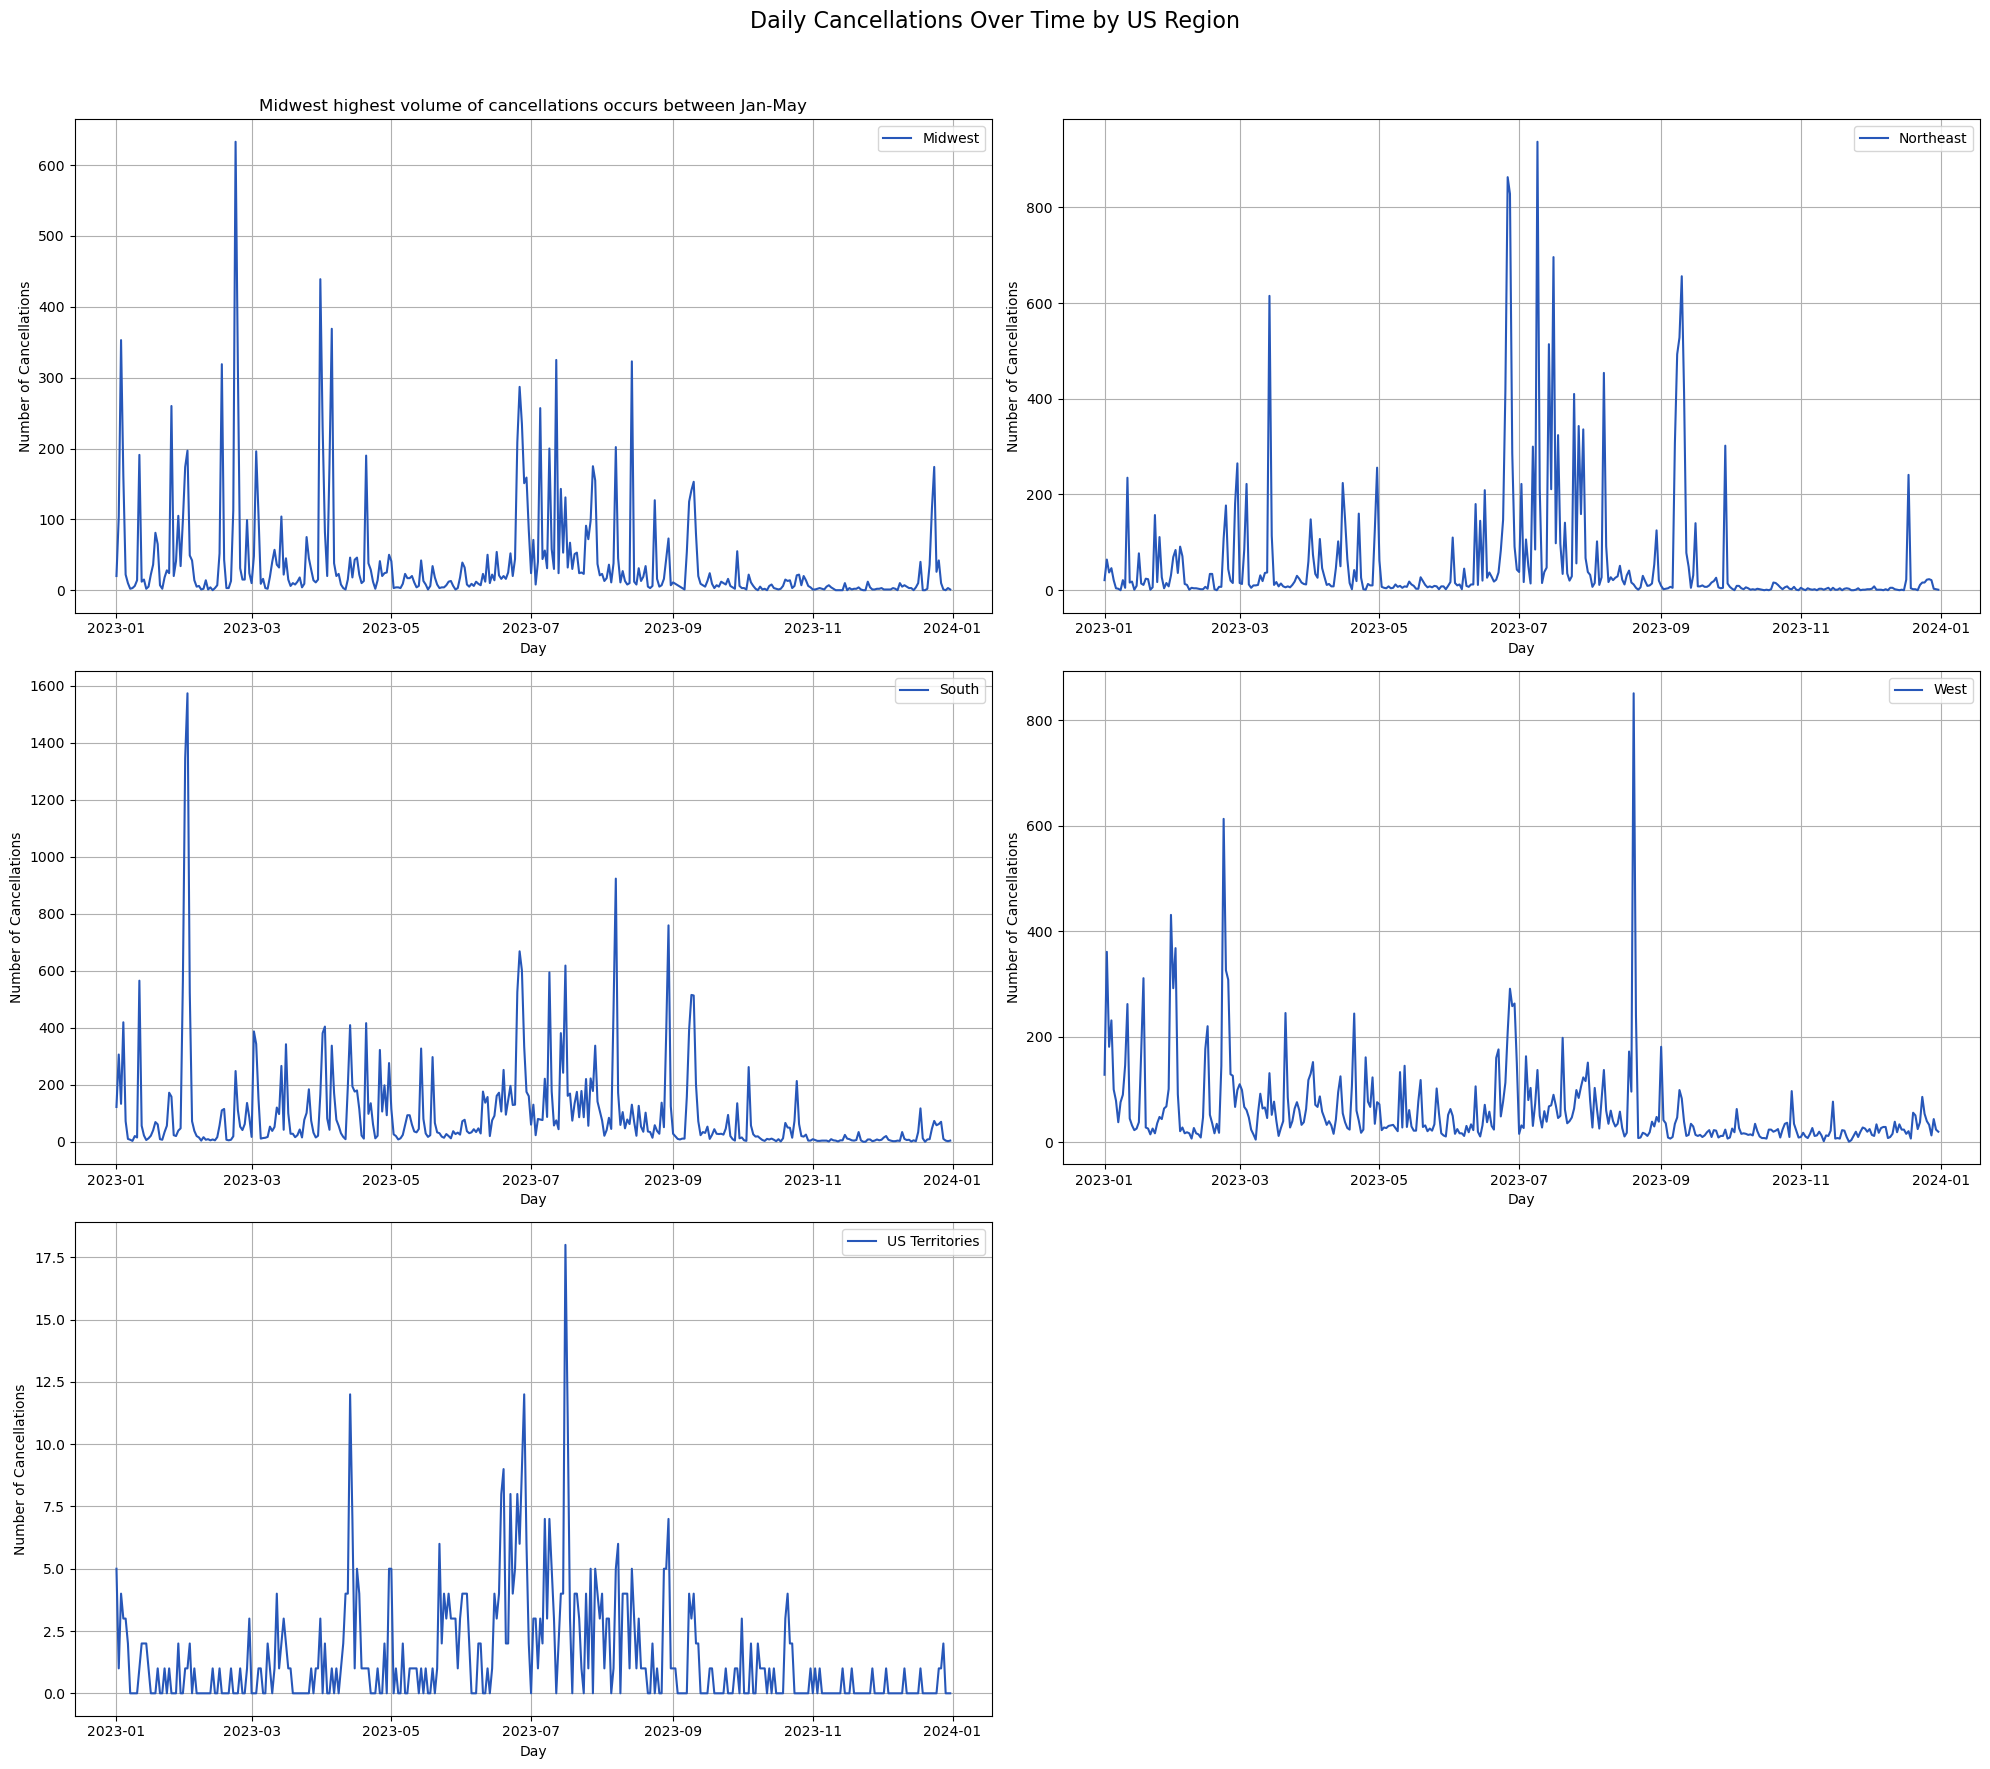

In [101]:
# Plot the daily resampled data
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(20,18))
ax[0, 0].plot(midwest_cancellations.index, midwest_cancellations.values, label='Midwest')
ax[0, 0].set_title('Midwest highest volume of cancellations occurs between Jan-May')
ax[0, 1].plot(northeast_cancellations.index, northeast_cancellations.values, label='Northeast')

ax[1, 0].plot(south_cancellations.index, south_cancellations.values, label='South')

ax[1, 1].plot(west_cancellations.index, west_cancellations.values, label='West')

ax[2, 0].plot(territories_cancellations.index, territories_cancellations.values, label='US Territories')


for i in range(3):
    for j in range(2):
        if i == 2 and j == 1:
            # Skip the empty subplot
            ax[i, j].axis('off')
            continue
        ax[i, j].legend()
        ax[i, j].set_xlabel('Day')
        ax[i, j].set_ylabel('Number of Cancellations')
        ax[i, j].grid(True)

# Set the main title and adjust layout
fig.suptitle('Daily Cancellations Over Time by US Region', fontsize=16)
plt.xticks(rotation=45)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


In [102]:
flights.head()

,year,quarter,month,day_of_month,day_of_week,marketing_airline_id,flight_number_marketing_airline,operating_airline_id,tail_number,origin_airport_id,origin_city_market_id,origin,origin_state,dest_airport_id,dest_city_market_id,dest,dest_state,dep_delay,dep_del15,departure_delay_groups,taxi_out,taxi_in,arr_delay,cancelled,cancellation_code,diverted,scheduled_elapsed_time,actual_elapsed_time,distance,distance_group,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,div_airport_landings,code_share_flight,origin_city,destination_city,scheduled_departure_datetime,scheduled_arrival_datetime,actual_departure_datetime,actual_arrival_datetime,airline_mkt,airline_ops,origin_timezone,destination_timezone,scheduled_departure_datetime_utc,actual_departure_datetime_utc,scheduled_arrival_datetime_utc,actual_arrival_datetime_utc,is_holiday,dep_delay_clipped,arr_delay_clipped,route_id,hour_of_day,departure_window,dep_delay_mean_10D,dep_delay_median_10D,dep_delay_max_10D,arr_delay_mean_10D,arr_delay_median_10D,arr_delay_max_10D,cancelled_sum_10D,div_airport_landings_sum_10D,n_flights_10D,dep_delay_mean_30D,dep_delay_median_30D,dep_delay_max_30D,arr_delay_mean_30D,arr_delay_median_30D,arr_delay_max_30D,cancelled_sum_30D,div_airport_landings_sum_30D,n_flights_30D,dep_delay_mean_90D,dep_delay_median_90D,dep_delay_max_90D,arr_delay_mean_90D,arr_delay_median_90D,arr_delay_max_90D,cancelled_sum_90D,div_airport_landings_sum_90D,n_flights_90D,departure_status,arrival_status,airline_cancellation_performance,region_origin,division_origin,region_dest,division_dest
0,2023,3,8,6,7,20416,2252,20416,N978NK,12889,32211,LAS,NV,11057,31057,CLT,NC,NaN,NaN,NaN,NaN,NaN,NaN,1,Weather,0,263.0,NaN,1916.0,8,NaN,NaN,NaN,NaN,NaN,0.0,0,Las Vegas,Charlotte,2023-08-06 23:59:00,2023-08-07 07:22:00,NaT,NaT,Spirit Air Lines,Spirit Air Lines,America/Los_Angeles,America/New_York,2023-08-07 07:00:00+00:00,NaT,2023-08-07 11:00:00+00:00,NaT,0,NaN,NaN,3228,23,late night,5.125000,2.0,31.0,-5.000000,-6.0,16.0,3.0,0.0,8.0,15.518519,5.0,82.0,4.923077,0.5,62.0,4.0,0.0,27.0,15.714286,6.0,163.0,4.903614,-2.0,166.0,5.0,0.0,84.0,cancelled,cancelled,above average,West,Mountain,South,South Atlantic
1,2023,3,8,7,1,20416,2252,20416,N974NK,12889,32211,LAS,NV,11057,31057,CLT,NC,76.0,1.0,5.0,19.0,9.0,69.0,0,NaN,0,263.0,256.0,1916.0,8,3.0,0.0,1.0,0.0,65.0,0.0,0,Las Vegas,Charlotte,2023-08-07 23:59:00,2023-08-08 07:22:00,2023-08-08 01:15:00,2023-08-08 08:31:00,Spirit Air Lines,Spirit Air Lines,America/Los_Angeles,America/New_York,2023-08-08 07:00:00+00:00,2023-08-08 08:15:00+00:00,2023-08-08 11:00:00+00:00,2023-08-08 12:31:00+00:00,0,76.0,69.0,3228,23,late night,14.000000,2.0,76.0,4.714286,-6.0,69.0,3.0,0.0,8.0,17.740741,5.0,82.0,7.961538,5.0,69.0,4.0,0.0,27.0,16.690476,7.0,163.0,5.819277,-1.0,166.0,5.0,0.0,84.0,delayed,delayed,above average,West,Mountain,South,South Atlantic
2,2023,3,8,9,3,20416,2252,20416,N519NK,12889,32211,LAS,NV,11057,31057,CLT,NC,-11.0,0.0,-1.0,14.0,10.0,-13.0,0,NaN,0,258.0,256.0,1916.0,8,NaN,NaN,NaN,NaN,NaN,0.0,0,Las Vegas,Charlotte,2023-08-09 23:10:00,2023-08-10 06:28:00,2023-08-09 22:59:00,2023-08-10 06:15:00,Spirit Air Lines,Spirit Air Lines,America/Los_Angeles,America/New_York,2023-08-10 06:00:00+00:00,2023-08-10 05:59:00+00:00,2023-08-10 10:00:00+00:00,2023-08-10 10:15:00+00:00,0,-11.0,-13.0,3228,23,late night,12.375000,1.5,76.0,5.000000,-6.0,69.0,3.0,0.0,8.0,15.185185,5.0,82.0,6.192308,0.5,69.0,4.0,0.0,27.0,16.710843,7.0,163.0,5.573171,-2.0,166.0,5.0,0.0,83.0,early,early,above average,West,Mountain,South,South Atlantic
3,2023,3,8,10,4,20416,2252,20416,N532NK,12889,32211,LAS,NV,11057,31057,CLT,NC,-8.0,0.0,-1.0,12.0,7.0,-30.0,0,NaN,0,258.0,236.0,1916.0,8,NaN,NaN,NaN,NaN,NaN,0.0,0,Las Vegas,Charlotte,2023-08-10 23:10:00,2023-08-11 06:28:00,2023-08-10 23:02:00,2023-08-11 05:58:00,Spirit Air Lines,Spirit Air Lines,America/Los_Angeles,America/New_York,2023-08-11 06:00:00+00:00,2023-08-11 06:02:00+00:00,2023-08-11 10:00:00+00:00,2023-08-11 09:58:00+00:00,0,

In [103]:
# regional cancellations by month
regional_cancellations_by_month = flights.groupby(['region_origin', 'month']).agg(
    cancellations=('cancelled', 'sum'),
    total_flights=('cancelled', 'count'))

regional_cancellations_by_month['monthly_cancellation_rate'] = round(regional_cancellations_by_month['cancellations'] / regional_cancellations_by_month['total_flights'] * 100, 3)
cancellations_by_month = regional_cancellations_by_month.rename_axis(None, axis=1)\
    .rename_axis(None, axis=1).reset_index()

In [104]:
cancellations_by_month.head()

,region_origin,month,cancellations,total_flights,monthly_cancellation_rate
0,Midwest,1,1936,87554,2.211
1,Midwest,2,2024,81889,2.472
2,Midwest,3,1456,95277,1.528
3,Midwest,4,1630,92087,1.770
4,Midwest,5,363,95250,0.381


In [105]:
# regional cancellations by month
cancellations_by_month = flights.groupby(['month']).agg(
    cancellations=('cancelled', 'sum'),
    total_flights=('cancelled', 'count'))

cancellations_by_month['monthly_cancellation_rate'] = round(cancellations_by_month['cancellations'] / cancellations_by_month['total_flights'] * 100, 3)
cancellations_by_month = cancellations_by_month.rename_axis(None, axis=1)\
    .rename_axis(None, axis=1).reset_index()
cancellations_by_month

,month,cancellations,total_flights,monthly_cancellation_rate
0,1,11032,573634,1.923
1,2,9686,536066,1.807
2,3,7847,616055,1.274
3,4,10323,596492,1.731
4,5,3833,616551,0.622
5,6,12856,613380,2.096
6,7,15875,638834,2.485
7,8,9475,640133,1.480
8,9,7492,604627,1.239
9,10,2189,635449,0.344


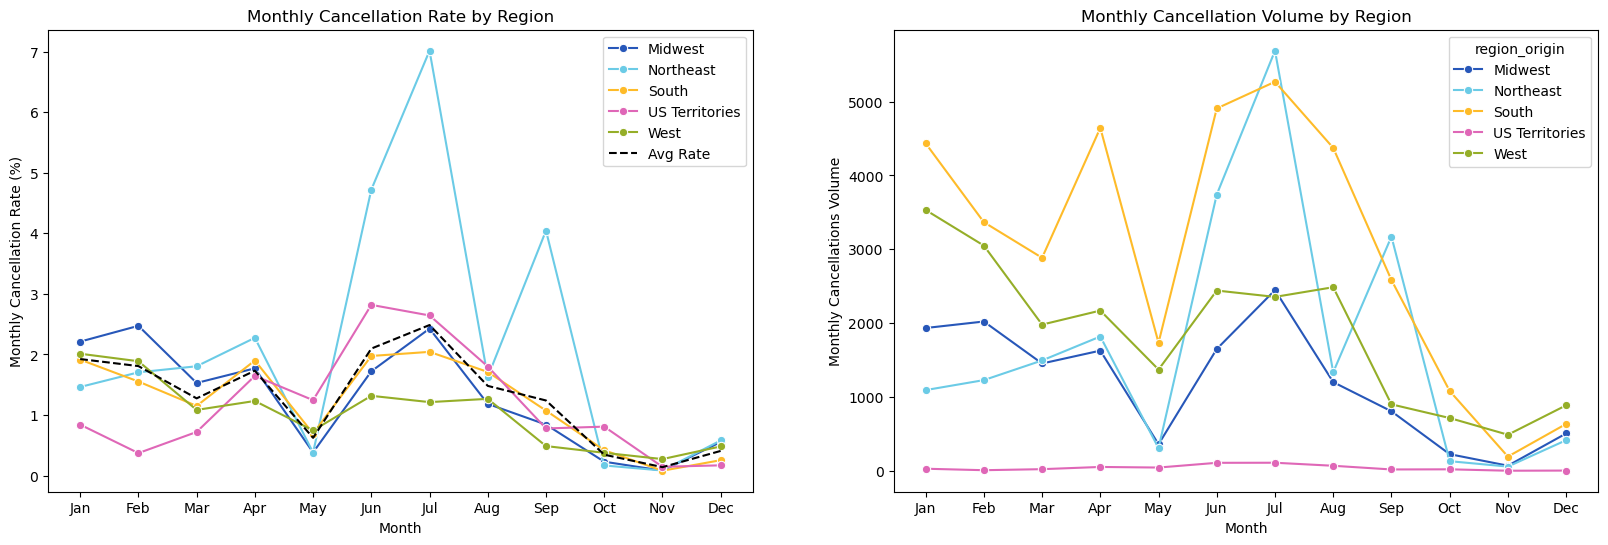

In [106]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))
sns.lineplot(data=regional_cancellations_by_month, x='month', y='monthly_cancellation_rate', hue='region_origin', marker='o', ax=ax[0])
sns.lineplot(data=cancellations_by_month, x='month', y='monthly_cancellation_rate', color='black', linestyle='--', label='Avg Rate', ax=ax[0])
sns.lineplot(data=regional_cancellations_by_month, x='month', y='cancellations', hue='region_origin', marker='o', ax=ax[1])

ax[0].set_title('Monthly Cancellation Rate by Region')
ax[0].set_xlabel('Month')
ax[0].set_ylabel('Monthly Cancellation Rate (%)')

ax[1].set_title('Monthly Cancellation Volume by Region')
ax[1].set_xlabel('Month')
ax[1].set_ylabel('Monthly Cancellations Volume')

month_abbreviations = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
ax[0].set_xticks(range(1, 13))
ax[0].set_xticklabels(month_abbreviations)

ax[1].set_xticks(range(1, 13))
ax[1].set_xticklabels(month_abbreviations)

plt.show()

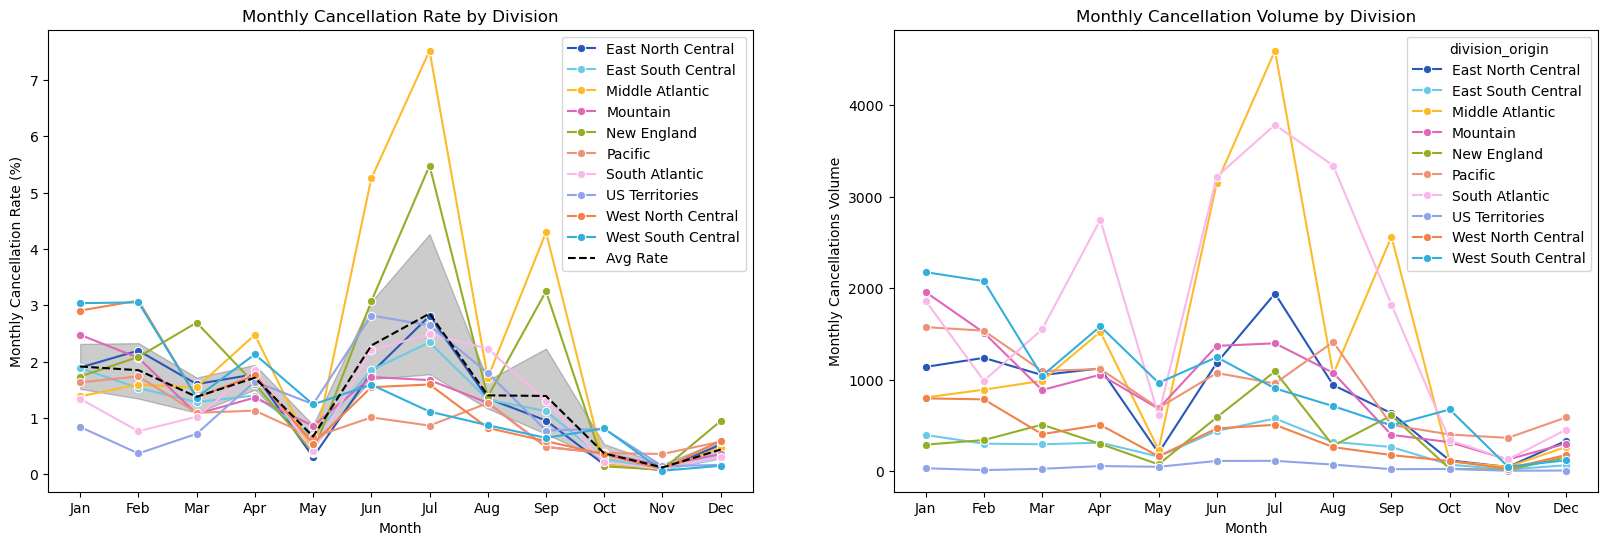

In [107]:
# division cancellations by month
division_cancellations_by_month = flights.groupby(['division_origin', 'month']).agg(
    cancellations=('cancelled', 'sum'),
    total_flights=('cancelled', 'count'))

division_cancellations_by_month['monthly_cancellation_rate'] = round(division_cancellations_by_month['cancellations'] / division_cancellations_by_month['total_flights'] * 100, 3)
cancellations_by_month = division_cancellations_by_month.rename_axis(None, axis=1)\
    .rename_axis(None, axis=1).reset_index()
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))
sns.lineplot(data=division_cancellations_by_month, x='month', y='monthly_cancellation_rate', hue='division_origin', marker='o', ax=ax[0])
sns.lineplot(data=cancellations_by_month, x='month', y='monthly_cancellation_rate', color='black', linestyle='--', label='Avg Rate', ax=ax[0])
sns.lineplot(data=division_cancellations_by_month, x='month', y='cancellations', hue='division_origin', marker='o', ax=ax[1])

ax[0].set_title('Monthly Cancellation Rate by Division')
ax[0].set_xlabel('Month')
ax[0].set_ylabel('Monthly Cancellation Rate (%)')

ax[1].set_title('Monthly Cancellation Volume by Division')
ax[1].set_xlabel('Month')
ax[1].set_ylabel('Monthly Cancellations Volume')

month_abbreviations = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
ax[0].set_xticks(range(1, 13))
ax[0].set_xticklabels(month_abbreviations)

ax[1].set_xticks(range(1, 13))
ax[1].set_xticklabels(month_abbreviations)

plt.show()

### Distance

In [108]:
flights['distance'].describe().apply(lambda x: '{:.2f}'.format(x))

count    7276990.00
mean         806.90
std          593.94
min           21.00
25%          372.00
50%          647.00
75%         1044.00
max         5095.00
Name: distance, dtype: object

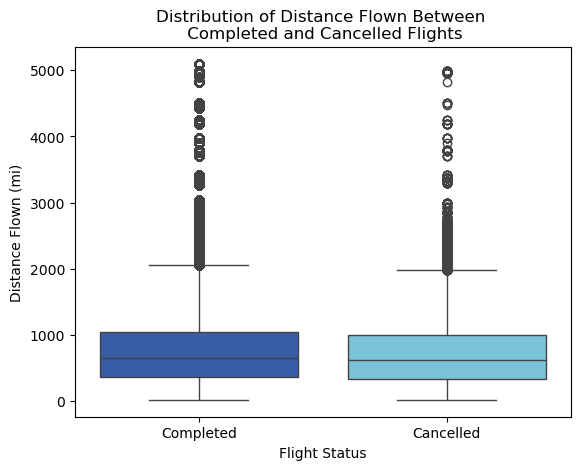

In [109]:
fig, ax = plt.subplots()
sns.boxplot(data=flights, x='cancelled', y='distance', hue='cancelled')
ax.set_title('Distribution of Distance Flown Between \n Completed and Cancelled Flights')
ax.set_xlabel('Flight Status')
ax.set_ylabel('Distance Flown (mi)')
plt.xticks(ticks=[0, 1], labels=["Completed", "Cancelled"])
plt.legend().set_visible(False)

/var/folders/b2/nkpmrw0s42q_zm32rwshljyr0000gn/T/ipykernel_53549/377142248.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', va='top')
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


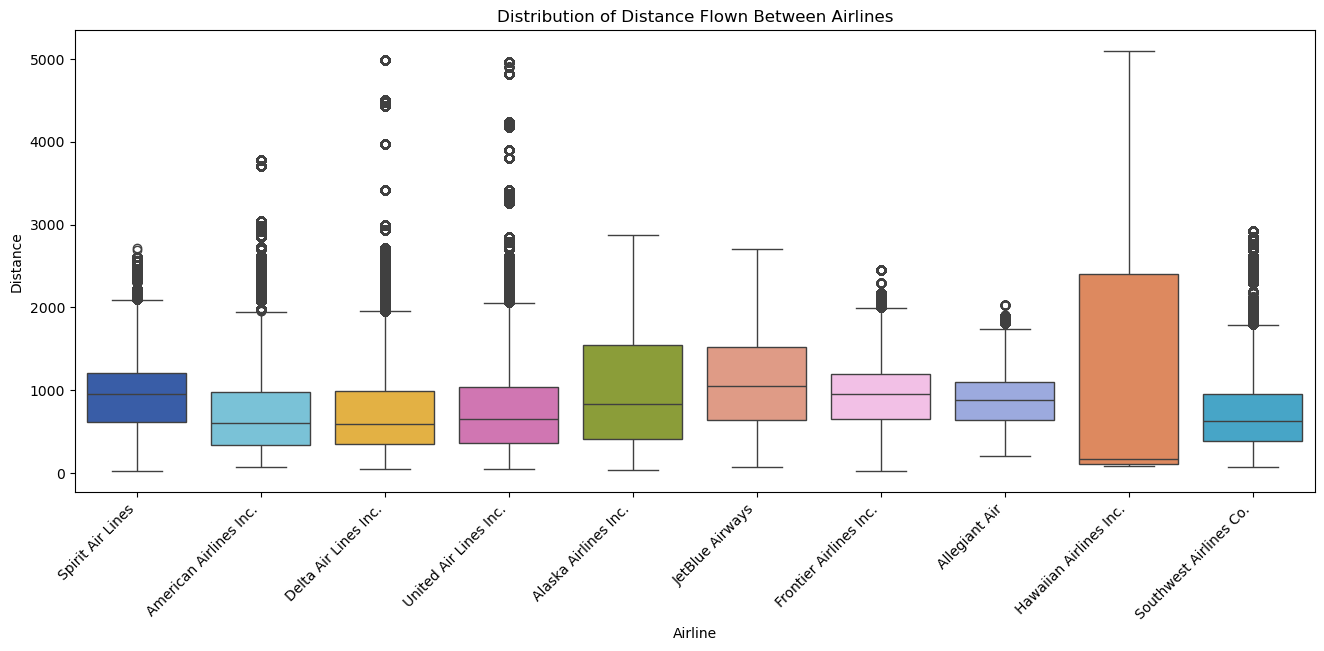

In [110]:
fig, ax = plt.subplots(figsize=(16,6))
sns.boxplot(data=flights, x='airline_mkt', y='distance', hue='airline_mkt')
ax.set_title('Distribution of Distance Flown Between Airlines')
ax.set_xlabel('Airline')
ax.set_ylabel('Distance')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', va='top')
plt.legend().set_visible(False)

/var/folders/b2/nkpmrw0s42q_zm32rwshljyr0000gn/T/ipykernel_53549/1182470606.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', va='top')
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


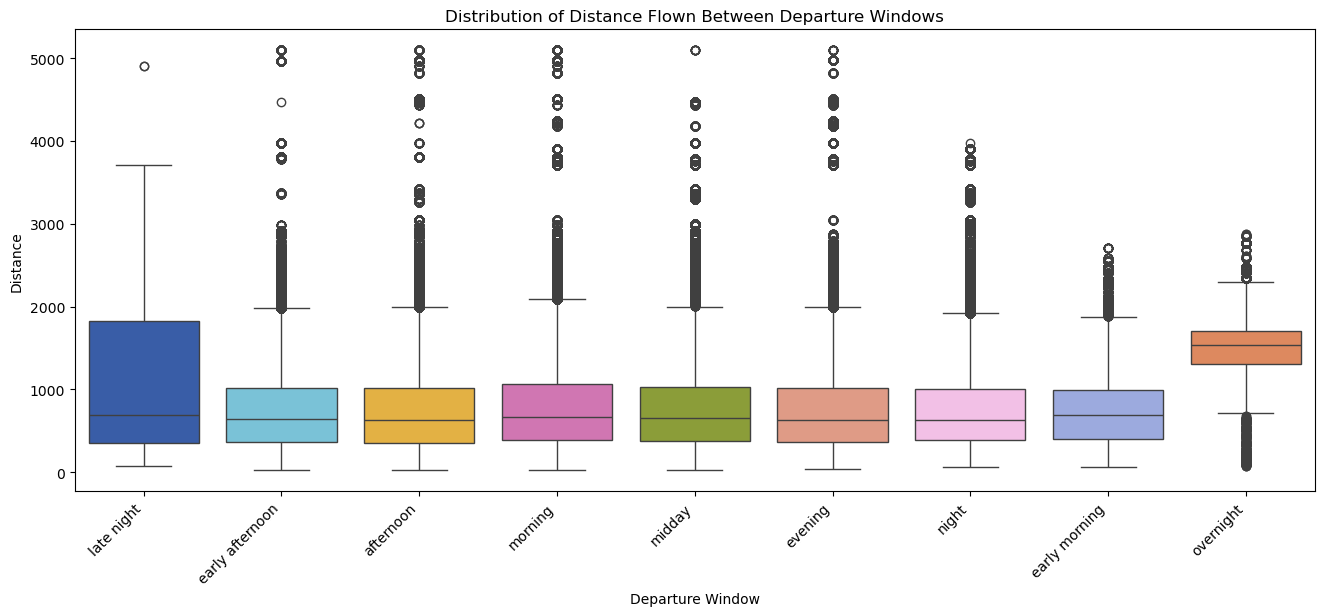

In [111]:
fig, ax = plt.subplots(figsize=(16,6))
sns.boxplot(data=flights, x='departure_window', y='distance', hue='departure_window')
ax.set_title('Distribution of Distance Flown Between Departure Windows')
ax.set_xlabel('Departure Window')
ax.set_ylabel('Distance')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', va='top')
plt.legend().set_visible(False)

### Historical Performance

In [112]:
flights.head()

,year,quarter,month,day_of_month,day_of_week,marketing_airline_id,flight_number_marketing_airline,operating_airline_id,tail_number,origin_airport_id,origin_city_market_id,origin,origin_state,dest_airport_id,dest_city_market_id,dest,dest_state,dep_delay,dep_del15,departure_delay_groups,taxi_out,taxi_in,arr_delay,cancelled,cancellation_code,diverted,scheduled_elapsed_time,actual_elapsed_time,distance,distance_group,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,div_airport_landings,code_share_flight,origin_city,destination_city,scheduled_departure_datetime,scheduled_arrival_datetime,actual_departure_datetime,actual_arrival_datetime,airline_mkt,airline_ops,origin_timezone,destination_timezone,scheduled_departure_datetime_utc,actual_departure_datetime_utc,scheduled_arrival_datetime_utc,actual_arrival_datetime_utc,is_holiday,dep_delay_clipped,arr_delay_clipped,route_id,hour_of_day,departure_window,dep_delay_mean_10D,dep_delay_median_10D,dep_delay_max_10D,arr_delay_mean_10D,arr_delay_median_10D,arr_delay_max_10D,cancelled_sum_10D,div_airport_landings_sum_10D,n_flights_10D,dep_delay_mean_30D,dep_delay_median_30D,dep_delay_max_30D,arr_delay_mean_30D,arr_delay_median_30D,arr_delay_max_30D,cancelled_sum_30D,div_airport_landings_sum_30D,n_flights_30D,dep_delay_mean_90D,dep_delay_median_90D,dep_delay_max_90D,arr_delay_mean_90D,arr_delay_median_90D,arr_delay_max_90D,cancelled_sum_90D,div_airport_landings_sum_90D,n_flights_90D,departure_status,arrival_status,airline_cancellation_performance,region_origin,division_origin,region_dest,division_dest
0,2023,3,8,6,7,20416,2252,20416,N978NK,12889,32211,LAS,NV,11057,31057,CLT,NC,NaN,NaN,NaN,NaN,NaN,NaN,1,Weather,0,263.0,NaN,1916.0,8,NaN,NaN,NaN,NaN,NaN,0.0,0,Las Vegas,Charlotte,2023-08-06 23:59:00,2023-08-07 07:22:00,NaT,NaT,Spirit Air Lines,Spirit Air Lines,America/Los_Angeles,America/New_York,2023-08-07 07:00:00+00:00,NaT,2023-08-07 11:00:00+00:00,NaT,0,NaN,NaN,3228,23,late night,5.125000,2.0,31.0,-5.000000,-6.0,16.0,3.0,0.0,8.0,15.518519,5.0,82.0,4.923077,0.5,62.0,4.0,0.0,27.0,15.714286,6.0,163.0,4.903614,-2.0,166.0,5.0,0.0,84.0,cancelled,cancelled,above average,West,Mountain,South,South Atlantic
1,2023,3,8,7,1,20416,2252,20416,N974NK,12889,32211,LAS,NV,11057,31057,CLT,NC,76.0,1.0,5.0,19.0,9.0,69.0,0,NaN,0,263.0,256.0,1916.0,8,3.0,0.0,1.0,0.0,65.0,0.0,0,Las Vegas,Charlotte,2023-08-07 23:59:00,2023-08-08 07:22:00,2023-08-08 01:15:00,2023-08-08 08:31:00,Spirit Air Lines,Spirit Air Lines,America/Los_Angeles,America/New_York,2023-08-08 07:00:00+00:00,2023-08-08 08:15:00+00:00,2023-08-08 11:00:00+00:00,2023-08-08 12:31:00+00:00,0,76.0,69.0,3228,23,late night,14.000000,2.0,76.0,4.714286,-6.0,69.0,3.0,0.0,8.0,17.740741,5.0,82.0,7.961538,5.0,69.0,4.0,0.0,27.0,16.690476,7.0,163.0,5.819277,-1.0,166.0,5.0,0.0,84.0,delayed,delayed,above average,West,Mountain,South,South Atlantic
2,2023,3,8,9,3,20416,2252,20416,N519NK,12889,32211,LAS,NV,11057,31057,CLT,NC,-11.0,0.0,-1.0,14.0,10.0,-13.0,0,NaN,0,258.0,256.0,1916.0,8,NaN,NaN,NaN,NaN,NaN,0.0,0,Las Vegas,Charlotte,2023-08-09 23:10:00,2023-08-10 06:28:00,2023-08-09 22:59:00,2023-08-10 06:15:00,Spirit Air Lines,Spirit Air Lines,America/Los_Angeles,America/New_York,2023-08-10 06:00:00+00:00,2023-08-10 05:59:00+00:00,2023-08-10 10:00:00+00:00,2023-08-10 10:15:00+00:00,0,-11.0,-13.0,3228,23,late night,12.375000,1.5,76.0,5.000000,-6.0,69.0,3.0,0.0,8.0,15.185185,5.0,82.0,6.192308,0.5,69.0,4.0,0.0,27.0,16.710843,7.0,163.0,5.573171,-2.0,166.0,5.0,0.0,83.0,early,early,above average,West,Mountain,South,South Atlantic
3,2023,3,8,10,4,20416,2252,20416,N532NK,12889,32211,LAS,NV,11057,31057,CLT,NC,-8.0,0.0,-1.0,12.0,7.0,-30.0,0,NaN,0,258.0,236.0,1916.0,8,NaN,NaN,NaN,NaN,NaN,0.0,0,Las Vegas,Charlotte,2023-08-10 23:10:00,2023-08-11 06:28:00,2023-08-10 23:02:00,2023-08-11 05:58:00,Spirit Air Lines,Spirit Air Lines,America/Los_Angeles,America/New_York,2023-08-11 06:00:00+00:00,2023-08-11 06:02:00+00:00,2023-08-11 10:00:00+00:00,2023-08-11 09:58:00+00:00,0,

<Axes: xlabel='n_flights_10D', ylabel='Percent'>

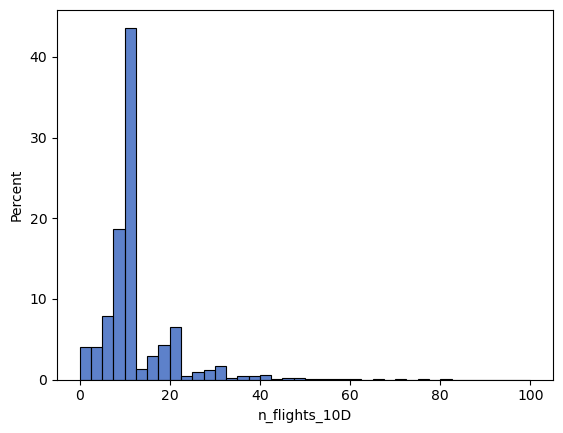

In [113]:
sns.histplot(data=flights, x='n_flights_10D', bins=40, stat='percent')

In [114]:
flights.to_csv(DATA_PATH + '/interim/flights_clean.csv', index=False)

### Origin and Destination Distributions



### Origin and Destination - Identify Top 20 Airports

**Questions to investigate:**
1. What are the top 20 origins based on volume?
2. What are the top 20 destinations based on volume?
3. What are the top 20 airports with the most cancelled flights based on volume?
4. What are the top 20 airport with the most cancellations based on the proportion of scheduled flights for each airport?
5. What are the top 20 airports with the most arrival delays based on volume?
6. What are the top 20 airports with the most arrival delays based on the proportion of scheduled flights for each airport?

In [115]:
# calculate top 20 origins for completed flights
origin_flights_df = completed_flights_df.groupby(['origin_state','origin', 'origin_city']).size().sort_values(ascending=False).reset_index(name='total_flights')
origin_flights_df.head(20)

,origin_state,origin,origin_city,total_flights
0,GA,ATL,Atlanta,334079
1,CO,DEN,Denver,295030
2,IL,ORD,Chicago,291464
3,TX,DFW,Dallas/Fort Worth,285716
4,NC,CLT,Charlotte,223207
5,CA,LAX,Los Angeles,193924
6,NV,LAS,Las Vegas,189496
7,WA,SEA,Seattle,180043
8,AZ,PHX,Phoenix,178263
9,NY,LGA,New York,162415


In [116]:
#calculate top 20 destinations for completed flights
dest_flights_df = completed_flights_df.groupby(['dest_state','dest', 'destination_city', 'dest_airport_id']).size().sort_values(ascending=False).reset_index(name='total_flights')
top_20_dest = dest_flights_df.head(20)
top_20_dest

,dest_state,dest,destination_city,dest_airport_id,total_flights
0,GA,ATL,Atlanta,10397,333971
1,CO,DEN,Denver,11292,294807
2,IL,ORD,Chicago,13930,291151
3,TX,DFW,Dallas/Fort Worth,11298,285647
4,NC,CLT,Charlotte,11057,223163
5,CA,LAX,Los Angeles,12892,193919
6,NV,LAS,Las Vegas,12889,189438
7,WA,SEA,Seattle,14747,179886
8,AZ,PHX,Phoenix,14107,178202
9,NY,LGA,New York,12953,162354


The top 20 origins are the same top 20 destinations for completed flights. 

Text(0, 0.5, 'Total Completed Flights')

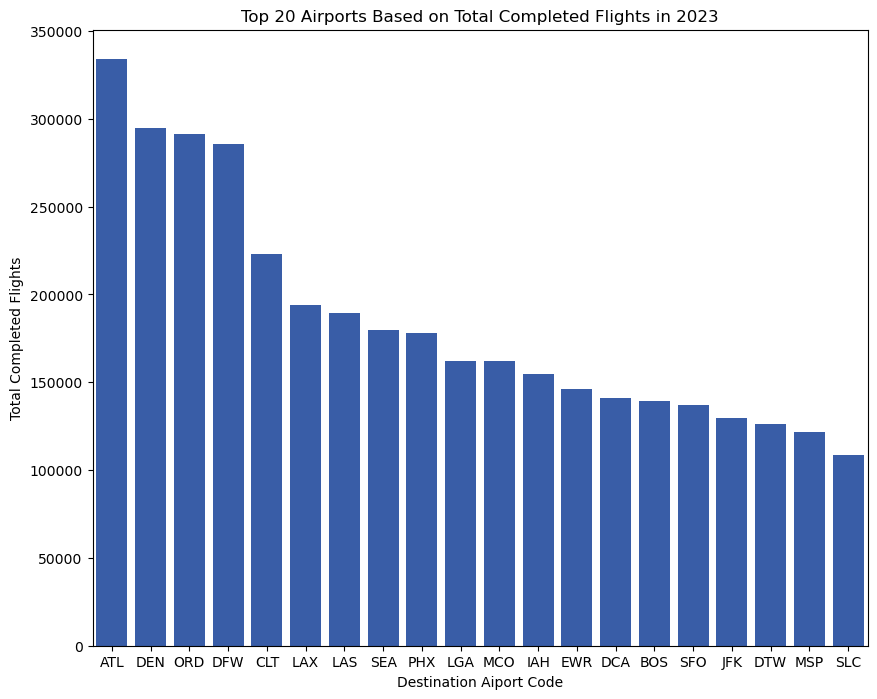

In [117]:
# plot top 20 destinations as a bar plot
fig, ax = plt.subplots(figsize=(10,8))
sns.barplot(data=top_20_dest, x='dest', y='total_flights')
plt.title('Top 20 Airports Based on Total Completed Flights in 2023')
plt.xlabel('Destination Aiport Code')
plt.ylabel('Total Completed Flights')

In [118]:
# calculate number of cancelled flights for each airport
dest_flights_canc_df = cancelled_flights_df.groupby(['dest_state','dest', 'destination_city', 'dest_airport_id']).size().sort_values(ascending=False).reset_index(name='total_cancelled')

# top 20 airports based on total cancellations
dest_flights_canc_df.head(20)

,dest_state,dest,destination_city,dest_airport_id,total_cancelled
0,TX,DFW,Dallas/Fort Worth,11298,4691
1,CO,DEN,Denver,11292,4587
2,NJ,EWR,Newark,11618,4574
3,NY,LGA,New York,12953,4553
4,IL,ORD,Chicago,13930,3932
5,NY,JFK,New York,12478,3158
6,GA,ATL,Atlanta,10397,2915
7,MA,BOS,Boston,10721,2606
8,NV,LAS,Las Vegas,12889,2340
9,FL,MCO,Orlando,13204,2338


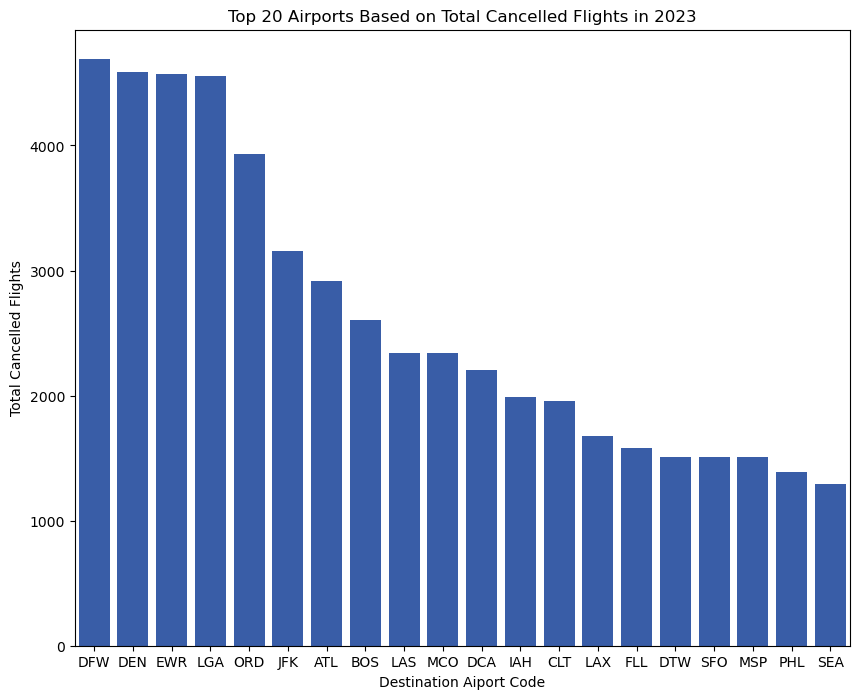

In [119]:
# plot airports based on total cancellations
fig, ax = plt.subplots(figsize=(10,8))
sns.barplot(data=dest_flights_canc_df.head(20), x='dest', y='total_cancelled')
plt.title('Top 20 Airports Based on Total Cancelled Flights in 2023')
plt.xlabel('Destination Aiport Code')
plt.ylabel('Total Cancelled Flights');

In [120]:
top_20_set = set(top_20_dest['dest'])
top_20_canc_set = set(dest_flights_canc_df.head(20)['dest'])

aiport_diff = top_20_set - top_20_canc_set
airport_diff_rev = top_20_canc_set - top_20_set
print(f'The airports from top 20 destinations not in top 20 cancellations are {aiport_diff}. \n')
print(f'The airports from top 20 cancellations not in top 20 destinations are {airport_diff_rev}.')

The airports from top 20 destinations not in top 20 cancellations are {'SLC', 'PHX'}. 

The airports from top 20 cancellations not in top 20 destinations are {'FLL', 'PHL'}.


The Salt Lake City and Phoenix airports are in the top 20 airports based on volume, but not in the top 20 for cancellations. 

The Philadelphia and Fort Lauderdale aiports are in the top 20 airports based on cancellations but not in the top 20 for volume. 

In [121]:
# calculate proportion of cancelled flights at each aiport
dest_flights_canc_df['scheduled_flights'] = dest_flights_canc_df['dest'].map(flights.groupby('dest').size()).fillna(0)
dest_flights_canc_df['proportion_cancelled'] = dest_flights_canc_df['total_cancelled'] / dest_flights_canc_df['scheduled_flights'].replace(0, np.nan)
dest_flights_canc_df.sort_values('total_cancelled', ascending=False).head(20)

,dest_state,dest,destination_city,dest_airport_id,total_cancelled,scheduled_flights,proportion_cancelled
0,TX,DFW,Dallas/Fort Worth,11298,4691,290338,0.016157
1,CO,DEN,Denver,11292,4587,299394,0.015321
2,NJ,EWR,Newark,11618,4574,150982,0.030295
3,NY,LGA,New York,12953,4553,166907,0.027279
4,IL,ORD,Chicago,13930,3932,295083,0.013325
5,NY,JFK,New York,12478,3158,133038,0.023738
6,GA,ATL,Atlanta,10397,2915,336886,0.008653
7,MA,BOS,Boston,10721,2606,141897,0.018365
8,NV,LAS,Las Vegas,12889,2340,191778,0.012202
9,FL,MCO,Orlando,13204,2338,164351,0.014226


In [122]:
# top 20 airports based on highest proportions of cancelled flights
dest_flights_canc_df.sort_values('proportion_cancelled', ascending=False).head(20)

,dest_state,dest,destination_city,dest_airport_id,total_cancelled,scheduled_flights,proportion_cancelled
307,AK,ADK,Adak Island,10165,8,104,0.076923
161,ME,PQI,Presque Isle/Houlton,14231,48,643,0.074650
345,CO,PUB,Pueblo,14288,2,27,0.074074
271,MA,HYA,Hyannis,12250,13,208,0.062500
115,NY,ITH,Ithaca/Cortland,12397,88,1446,0.060858
181,NE,LBF,North Platte,12899,37,680,0.054412
56,CO,ASE,Aspen,10372,350,6437,0.054373
178,MI,CMX,Hancock/Houghton,11076,38,704,0.053977
165,WY,COD,Cody,11097,45,836,0.053828
211,AK,DLG,Dillingham,11336,27,504,0.053571


The top 20 airports with the highest proportion of cancellations are much smaller airports by volume compared to the aiports with the most cancellations. Most of these airports had less than 2,000 scheduled flights in 2023, except for Aspen which had over 6,300 flights scheduled. 

In [123]:
delayed_flights_df = flights[flights['arrival_status'] == 'delayed']
dest_flights_del_df = delayed_flights_df.groupby(['dest_state', 'dest', 'destination_city', 'dest_airport_id']).size().sort_values(ascending=False).reset_index(name='total_delays')
dest_flights_del_df.head(20)

,dest_state,dest,destination_city,dest_airport_id,total_delays
0,CO,DEN,Denver,11292,63936
1,TX,DFW,Dallas/Fort Worth,11298,61248
2,IL,ORD,Chicago,13930,57511
3,GA,ATL,Atlanta,10397,56313
4,NV,LAS,Las Vegas,12889,49217
5,FL,MCO,Orlando,13204,44324
6,NC,CLT,Charlotte,11057,41988
7,CA,LAX,Los Angeles,12892,40345
8,AZ,PHX,Phoenix,14107,35727
9,MA,BOS,Boston,10721,33440


In [124]:
top_20_del_set = set(dest_flights_del_df.head(20)['dest'])

aiport_diff = top_20_set - top_20_del_set
airport_diff_rev = top_20_del_set - top_20_set
airport_diff_canc_del = top_20_del_set - top_20_canc_set
airport_diff_canc_del_rev = top_20_canc_set - top_20_del_set

print(f'The airports from top 20 destinations not in top 20 delays are {aiport_diff}. \n')
print(f'The airports from top 20 delays not in top 20 destinations are {airport_diff_rev}.\n')
print(f'The airports from top 20 delays not in top 20 cancellations are {airport_diff_canc_del}.\n')
print(f'The airports from top 20 cancelled not in top 20 delays are {airport_diff_canc_del_rev}.')

The airports from top 20 destinations not in top 20 delays are {'DTW', 'SLC', 'MSP'}. 

The airports from top 20 delays not in top 20 destinations are {'FLL', 'MIA', 'PHL'}.

The airports from top 20 delays not in top 20 cancellations are {'MIA', 'PHX'}.

The airports from top 20 cancelled not in top 20 delays are {'DTW', 'MSP'}.


There is a lot of overlap between top airports based on volumes by destination, volume of cancelled flights, and volume of delayed flights. I want to limit the total number of airports for which I get weather data to 20 due to the size of the data. I will first select the top 15 airports based on volume and then add the next 5 that are not in the top 15 but are in the top cancellations and delays in that order. 

In [125]:
# set `Dest` as index for destinations, cancellations and delays dataframes
top_dest_flights_df = dest_flights_df.set_index('dest')
cancellations_sorted_df = dest_flights_canc_df.set_index('dest')
delayed_sorted_df = dest_flights_del_df.set_index('dest')

In [126]:
merged_df = top_dest_flights_df.merge(cancellations_sorted_df[['total_cancelled']], on=['dest'], how='outer')\
                .merge(delayed_sorted_df[['total_delays']], on=['dest'], how='outer')

In [127]:
# only keep top 15 airports based on total flights
top_15_volume = merged_df.sort_values('total_flights', ascending=False).head(15)

# get remaining 5 airports based on cancellations and delays that are not in top 15 by volume
remaining_airports = merged_df[~merged_df.index.isin(top_15_volume.index)]
additional_airports = remaining_airports.sort_values(['total_cancelled', 'total_delays'], ascending=False)

# combine with top 15 by volume
final_airports = pd.concat([top_15_volume, additional_airports])

final_airports = final_airports.head(20)

In [128]:
final_airports = final_airports.merge(region_mapping_df, left_on='dest_state', right_on='state_code', how='left')
top_20_final = final_airports.drop(columns='state_code')

In [129]:
top_20_final.to_csv(DATA_PATH + '/interim/final_airports.csv', index=False)

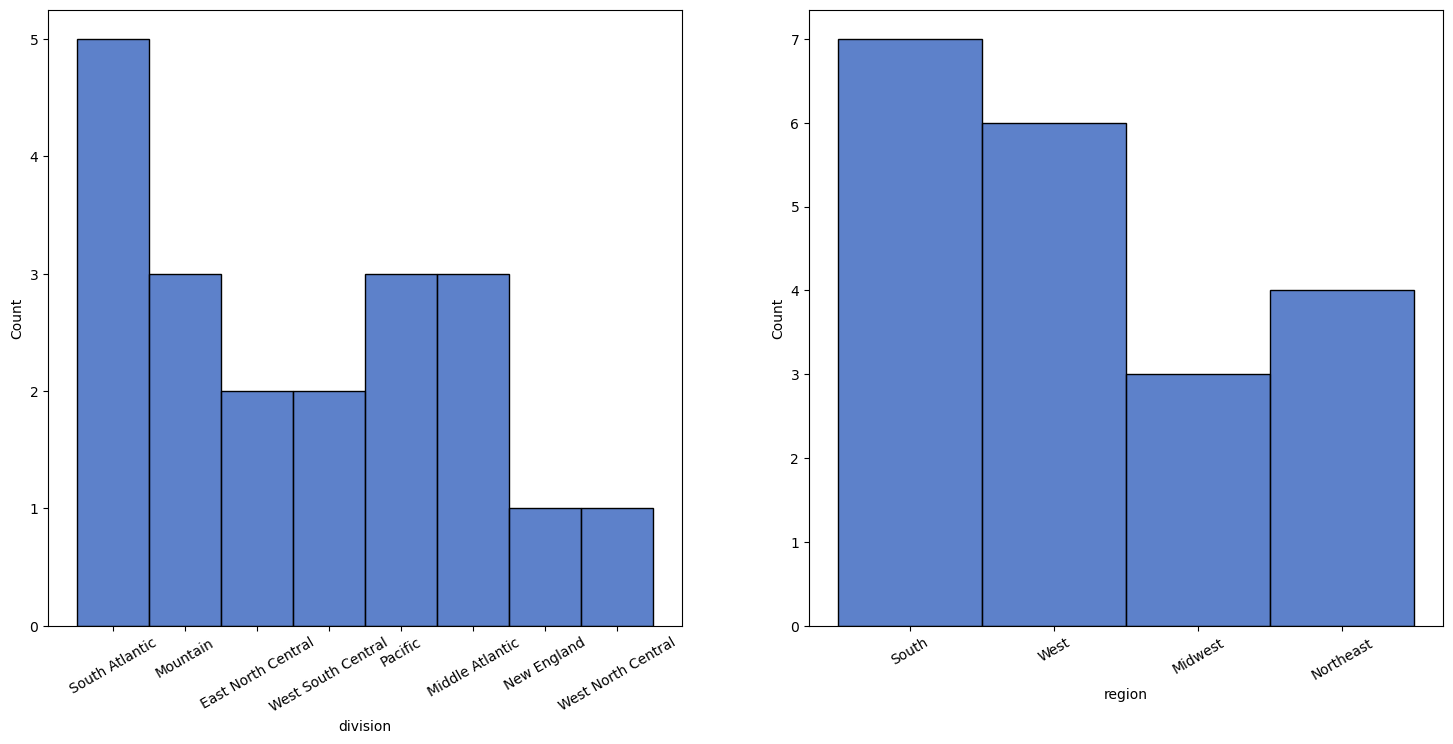

In [130]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18,8))

sns.histplot(top_20_final['division'], ax=ax[0])
ax[0].tick_params(axis='x', rotation=30)

sns.histplot(top_20_final['region'], ax=ax[1])
ax[1].tick_params(axis='x', rotation=30)

In [131]:
# import airport df to get lat and lon for weather data
airports_df = pd.read_csv(DATA_PATH + '/interim/airports.csv')

In [132]:
airports_df.head()

,AIRPORT_SEQ_ID,AIRPORT_ID,AIRPORT,DISPLAY_AIRPORT_NAME,DISPLAY_AIRPORT_CITY_NAME_FULL,AIRPORT_WAC,AIRPORT_STATE_NAME,AIRPORT_STATE_CODE,AIRPORT_STATE_FIPS,CITY_MARKET_ID,DISPLAY_CITY_MARKET_NAME_FULL,CITY_MARKET_WAC,LATITUDE,LONGITUDE,AIRPORT_START_DATE,AIRPORT_THRU_DATE,AIRPORT_IS_CLOSED,AIRPORT_IS_LATEST,TIMEZONE
0,1000101,10001,01A,Afognak Lake Airport,"Afognak Lake, AK",1,Alaska,AK,2.0,30001,"Afognak Lake, AK",1,58.109444,-152.906667,7/1/2007 12:00:00 AM,NaN,0,1,America/Anchorage
1,1000301,10003,03A,Bear Creek Mining Strip,"Granite Mountain, AK",1,Alaska,AK,2.0,30003,"Granite Mountain, AK",1,65.548056,-161.071667,7/1/2007 12:00:00 AM,NaN,0,1,America/Anchorage
2,1000401,10004,04A,Lik Mining Camp,"Lik, AK",1,Alaska,AK,2.0,30004,"Lik, AK",1,68.083333,-163.166667,7/1/2007 12:00:00 AM,NaN,0,1,America/Nome
3,1000501,10005,05A,Little Squaw Airport,"Little Squaw, AK",1,Alaska,AK,2.0,30005,"Little Squaw, AK",1,67.570000,-148.183889,8/1/2007 12:00:00 AM,NaN,0,1,America/Anchorage
4,1000601,10006,06A,Kizhuyak Bay,"Kizhuyak, AK",1,Alaska,AK,2.0,30006,"Kizhuyak, AK",1,57.745278,-152.882778,10/1/2007 12:00:00 AM,NaN,0,1,America/Anchorage


In [133]:
airports_geo = top_20_final.merge(airports_df[['DISPLAY_AIRPORT_NAME', 'AIRPORT', 'AIRPORT_ID', 'LATITUDE', 'LONGITUDE']], left_on='dest_airport_id', right_on='AIRPORT_ID')
airports_geo

,dest_state,destination_city,dest_airport_id,total_flights,total_cancelled,total_delays,region,division,DISPLAY_AIRPORT_NAME,AIRPORT,AIRPORT_ID,LATITUDE,LONGITUDE
0,GA,Atlanta,10397,333971,2915.0,56313,South,South Atlantic,Hartsfield-Jackson Atlanta International,ATL,10397,33.636667,-84.427778
1,CO,Denver,11292,294807,4587.0,63936,West,Mountain,Denver International,DEN,11292,39.861667,-104.673056
2,IL,Chicago,13930,291151,3932.0,57511,Midwest,East North Central,Chicago O'Hare International,ORD,13930,41.976944,-87.908056
3,TX,Dallas/Fort Worth,11298,285647,4691.0,61248,South,West South Central,Dallas/Fort Worth International,DFW,11298,32.897222,-97.037778
4,NC,Charlotte,11057,223163,1956.0,41988,South,South Atlantic,Charlotte Douglas International,CLT,11057,35.213611,-80.949167
5,CA,Los Angeles,12892,193919,1680.0,40345,West,Pacific,Los Angeles International,LAX,12892,33.942500,-118.408056
6,NV,Las Vegas,12889,189438,2340.0,49217,West,Mountain,Harry Reid International,LAS,12889,36.080000,-115.152222
7,WA,Seattle,14747,179886,1291.0,29228,West,Pacific,Seattle/Tacoma International,SEA,14747,47.450000,-122.311667
8,AZ,Phoenix,14107,178202,1270.0,35727,West,Mountain,Phoenix Sky Harbor International,PHX,14107,33.434167,-112.011667
9,NY,New York,12953,162354,4553.0,31670,Northeast,Middle Atlantic,LaGuardia,LGA,12953,40.777222,-73.872500


In [134]:
airports_geo[['AIRPORT', 'AIRPORT_ID', 'DISPLAY_AIRPORT_NAME', 'LATITUDE', 'LONGITUDE']].to_csv(DATA_PATH + '/interim/weather_geos.csv', index=False)